## **Project Name**    - ** PharmaOptimizer: Data-Driven Pricing Analysis for Smart Pharma Strategies**



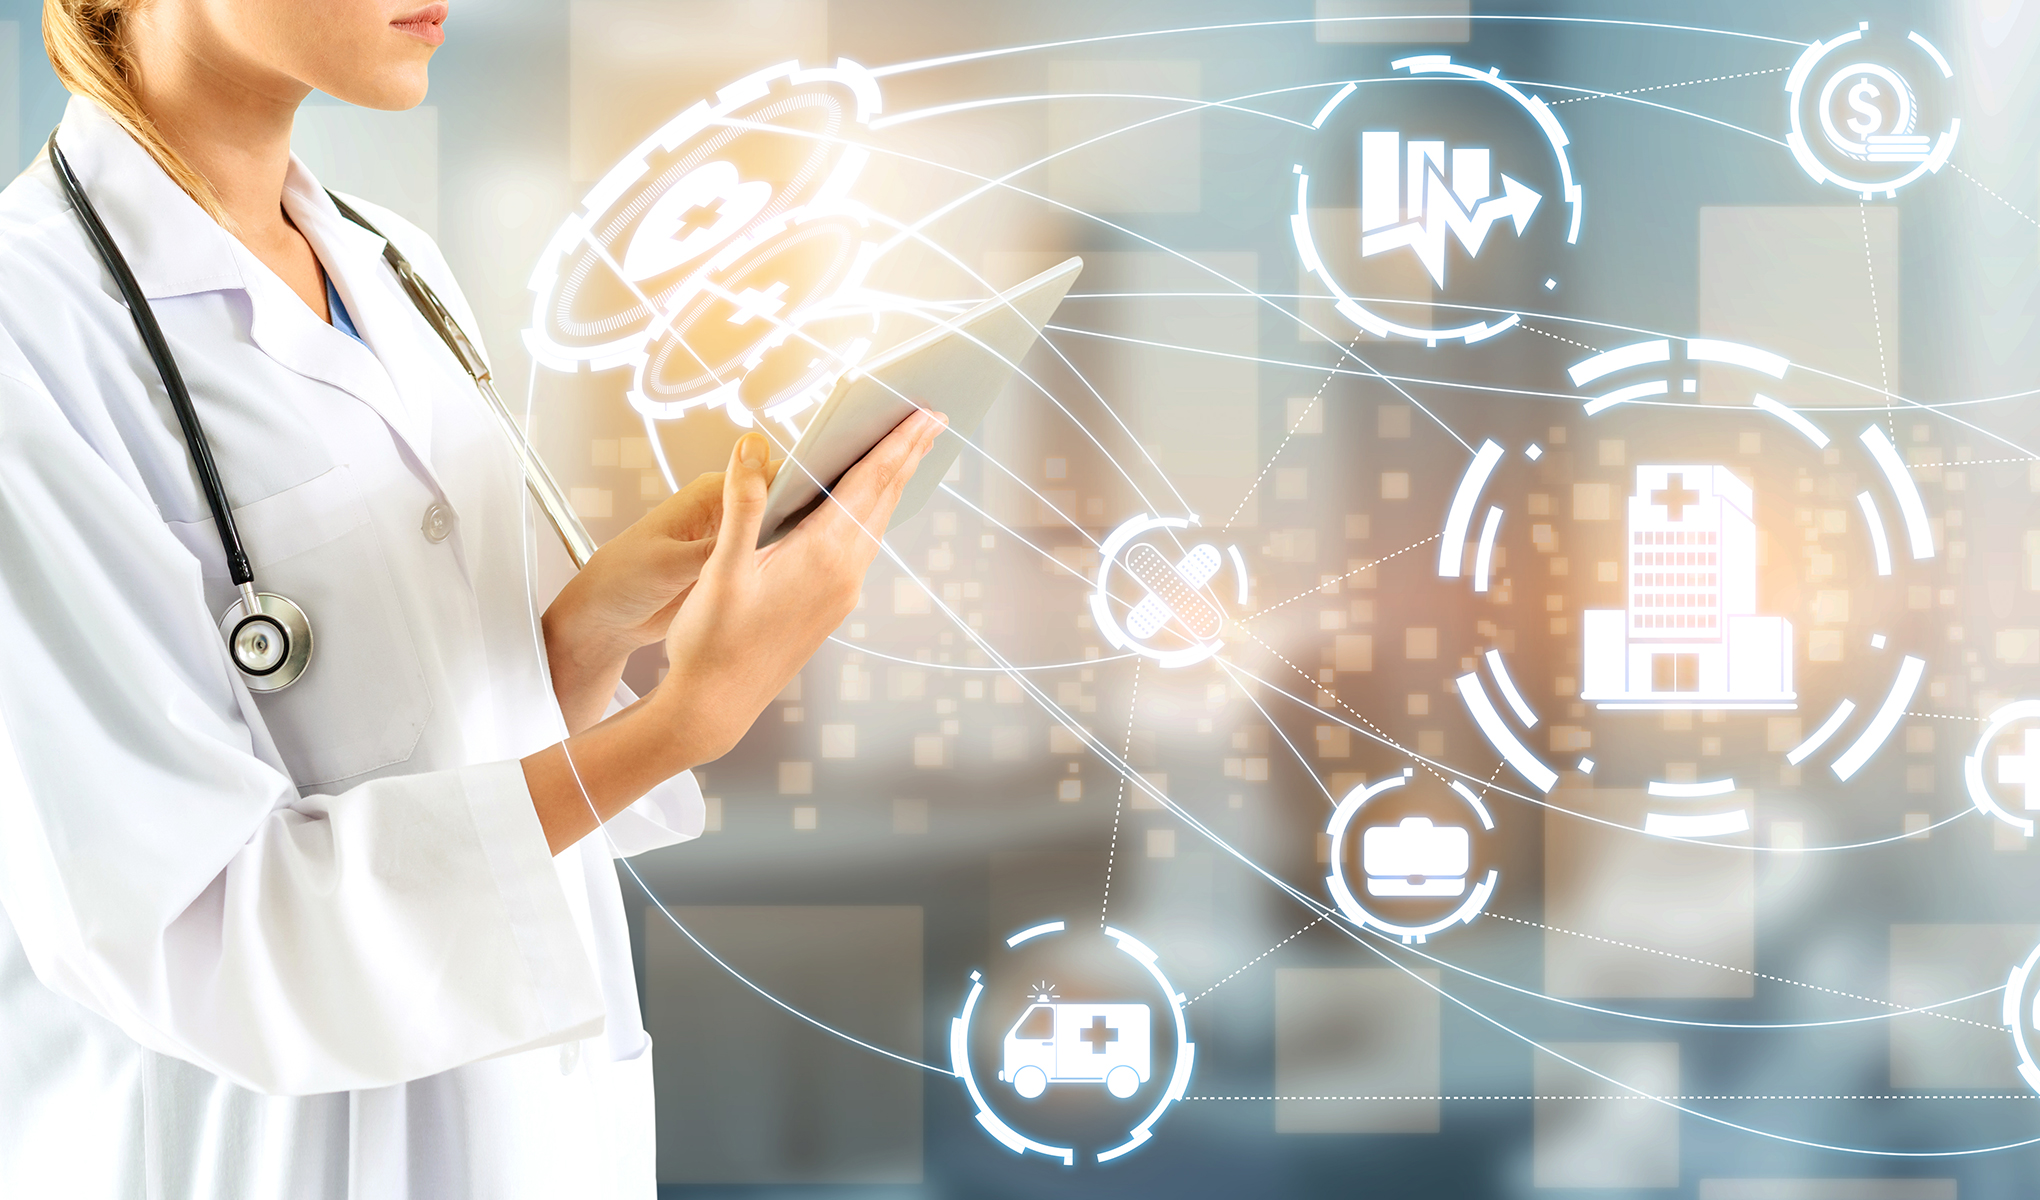

# **Project Summary -**

Pharmaceutical Price Prediction – Data-Driven Pricing Optimization
Project Overview
The pharmaceutical industry relies on accurate pricing strategies to balance profitability and affordability. This project leverages data analytics and machine learning to optimize medicine pricing by analyzing key attributes such as drug composition, dosage, and packaging. By employing predictive modeling, the project aims to enhance decision-making for manufacturers, retailers, and consumers, ensuring competitive pricing while maintaining profitability.

Price Optimization & Prediction
Optimizing pharmaceutical prices requires understanding various factors influencing costs. This project applies regression models like:

Linear Regression

Random Forest Regressor

XGBoost Regressor

LightGBM Regressor

The models considered multiple pricing factors, including:

✅ Active ingredients & dosage

✅ Number of tablets per strip

✅ Manufacturer details

✅ Market trends & pricing variations

Through rigorous model evaluation using RMSE, R² Score, and MAE, the Random Forest Regressor emerged as the best model, offering reliable price predictions and actionable insights for stakeholders.

Tools & Techniques
The project was developed using Python and leading data science libraries, including:

Pandas & NumPy for data preprocessing

Scikit-learn, XGBoost & LightGBM for model building

Matplotlib & Seaborn for data visualization

RandomizedSearchCV for hyperparameter tuning

Data preprocessing involved handling missing values, encoding categorical

variables, and applying log transformation to normalize price distributions.

Key Business Impact
This project delivers substantial value by enabling:

📌 Informed Pricing Strategies – Helping manufacturers and retailers optimize product prices.

📌 Competitive Market Positioning – Adjusting prices based on data-driven insights.

📌 Targeted Marketing & Inventory Planning – Segmenting products for effective marketing campaigns.

📌 Anomaly Detection – Identifying unexpected pricing variations or errors.

📌 Consumer Benefits – Ensuring affordability through fair pricing and cost predictions.

# **GitHub Link -**

https://github.com/Sanjay00013/Netmeds_End_to_End_Data_Analysis_Project

# **Problem Statement**


The pharmaceutical industry faces complex pricing challenges due to factors such as raw material costs, market demand, competition, government regulations, and regional price variations. Inefficient pricing strategies can lead to profit loss, overpricing, reduced accessibility, and compliance issues.


This project aims to address these challenges by leveraging advanced data analytics and machine learning techniques to develop solutions that enable:

Price Optimization: Predicting optimal prices for pharmaceutical products based on their attributes.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
pip install category-encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest, GradientBoostingRegressor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb
import pickle
from category_encoders import TargetEncoder


### Dataset Loading

In [3]:
file_path="/content/Netmeds Dashboard.xlsx"
data = pd.read_excel(file_path, sheet_name="Data")



/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Dataset First View

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tablet Name                  23897 non-null  object 
 1   Disease                      23897 non-null  object 
 2   Rx Required                  23897 non-null  int64  
 3   Price                        23897 non-null  int64  
 4   Discount                     23897 non-null  int64  
 5   Country of Origin            23897 non-null  object 
 6   Manufacturer.1.1             23897 non-null  object 
 7   Tablet Info                  23897 non-null  object 
 8   gm per lotion                23896 non-null  float64
 9   Facewash. gm per tube        23897 non-null  int64  
 10  Spray ml per tube.1          23888 non-null  float64
 11  Ointment gm per tube.1       23897 non-null  int64  
 12  oral solution ml per tube.1  23897 non-null  int64  
 13  Cream gm per tub

In [5]:

data

Tablet Name              Disease  Rx Required  \
0                 Cogniza Tablet 10'S                 ADHD            1   
1             Atrest 25mg Tablet 10'S                 ADHD            1   
2            Capnea Oral Solution 1ml                 ADHD            1   
3                Capnea Injection 1ml                 ADHD            1   
4        Cognistar 60mg Injection 1's                 ADHD            1   
...                               ...                  ...          ...   
23892   YULIFT 3X FIRMING Cream 100ml  Wrinkle/Anti Ageing            0   
23893               NERVANA Cream 50g  Wrinkle/Anti Ageing            0   
23894  DS GOLD ANTI AGEING Cream 50gm  Wrinkle/Anti Ageing            0   
23895             RETILIFT Cream 30gm  Wrinkle/Anti Ageing            0   
23896         MELARID Face Wash 100gm  Wrinkle/Anti Ageing            0   

       Price  Discount Country of Origin          Manufacturer.1.1  \
0        239         0             India       linux laboratories    
1        336        12             India  centaur pharmaceuticals    
2        276         0             India                    cipla    
3        247        12             India                    cipla    
4       1315        12             India                    lupin    
...      ...       ...               ...                       ...   
23892   2700         0             India     yuderma laboratories    
23893    399         0             India   leewell pharmaceutical    
23894   2209         0             India      adonis laboratories    
23895    951        12             India       apple therapeutics    
23896    540         0             India     yuderma laboratories    

                                             Tablet Info  gm per lotion  \
0                       Cerebroprotein Hydrolysate 90 mg            0.0   
1                                    Tetrabenazine 25 mg            0.0   
2                                         Caffeine 20 mg            0.0   
3                                         Caffeine 20 mg            0.0   
4                       Cerebroprotein Hydrolysate 60 mg            0.0   
...                                                  ...            ...   
23892  Aloe Vera Extract+Argan Oil+Ceramide+Niacinami...            0.0   
23893  Almond Oil+Aloe Vera+Coconut Oil+Shea Butter+U...            0.0   
23894                                          Skin Care            0.0   
23895  ALOE VERA+Ascorbyl Palmitate+RETINOL+Stearic A...            0.0   
23896                                      Not Available            0.0   

       Facewash. gm per tube  Spray ml per tube.1  Ointment gm per tube.1  \
0                          0                  0.0                       0   
1                          0                  0.0                       0   
2                          0                  0.0                       0   
3                          0                  0.0                       0   
4                          0                  0.0                       0   
...                      ...                  ...                     ...   
23892                      0                  0.0                       0   
23893                      0                  0.0                       0   
23894                      0                  0.0                       0   
23895                      0                  0.0                       0   
23896                    100                  0.0                       0   

       oral solution ml per tube.1  Cream gm per tube.1  injection.1  \
0                                0                  0.0          0.0   
1                                0                  0.0          0.0   
2                                1                  0.0          0.0   
3                                0                  0.0          1.0   
4                                0                  0.0          1.0   
...                       

### Dataset Rows & Columns count

In [6]:

rows, columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 23897
Number of columns: 18


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tablet Name                  23897 non-null  object 
 1   Disease                      23897 non-null  object 
 2   Rx Required                  23897 non-null  int64  
 3   Price                        23897 non-null  int64  
 4   Discount                     23897 non-null  int64  
 5   Country of Origin            23897 non-null  object 
 6   Manufacturer.1.1             23897 non-null  object 
 7   Tablet Info                  23897 non-null  object 
 8   gm per lotion                23896 non-null  float64
 9   Facewash. gm per tube        23897 non-null  int64  
 10  Spray ml per tube.1          23888 non-null  float64
 11  Ointment gm per tube.1       23897 non-null  int64  
 12  oral solution ml per tube.1  23897 non-null  int64  
 13  Cream gm per tub

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values_count = data.isnull().sum()

print("Missing values count for each column:")
print(missing_values_count)

total_missing_values = data.isnull().sum().sum()
print(f"Total number of missing values: {total_missing_values}")


Missing values count for each column:
Tablet Name                     0
Disease                         0
Rx Required                     0
Price                           0
Discount                        0
Country of Origin               0
Manufacturer.1.1                0
Tablet Info                     0
gm per lotion                   1
Facewash. gm per tube           0
Spray ml per tube.1             9
Ointment gm per tube.1          0
oral solution ml per tube.1     0
Cream gm per tube.1             9
injection.1                    19
Tablet per strip.1              7
capsule per strip.1             2
Merged                          0
dtype: int64
Total number of missing values: 47


### What did you know about your dataset?

Total Rows and Columns:

The dataset has 23,897 rows and 8 columns.
Data Columns and Types:

Tablet Name: Object (string) type, with no missing values.
Disease: Object (string) type, with no missing values.
Rx Required: Boolean (True/False) type, with no missing values.
Price: Integer type, with no missing values.
Discount: Integer type, with no missing values.
Country of Origin: Object (string) type, with no missing values.
Manufacturer: Object (string) type, with no missing values.
Tablet Info: Object (string) type, with no missing values.
Missing Values:

There are no missing (null) values in any of the columns, as the count of non-null values in all columns matches the total number of rows.
Duplicate Rows:

The dataset has no duplicate rows.
Data Integrity:

The dataset is clean in terms of missing data and duplicates, making it suitable for analysis or model training without needing to address those issues.
Summary:
The dataset appears to be well-structured with no missing values or duplicate records, making it easy to proceed with analysis, feature engineering, or model training without any immediate data cleaning tasks related to nulls or duplicates.

## ***2. Understanding Your Variables***

In [10]:
data.columns

Index(['Tablet Name', 'Disease', 'Rx Required', 'Price', 'Discount',
       'Country of Origin', 'Manufacturer.1.1', 'Tablet Info', 'gm per lotion',
       'Facewash. gm per tube', 'Spray ml per tube.1',
       'Ointment gm per tube.1', 'oral solution ml per tube.1',
       'Cream gm per tube.1', 'injection.1', 'Tablet per strip.1',
       'capsule per strip.1', 'Merged'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include=['object',"bool"])

Tablet Name            Disease Country of Origin  \
count                     23897              23897             23897   
unique                    23897                140                29   
top     MELARID Face Wash 100gm  Fungal Infections             India   
freq                          1               1000             23615   

                      Manufacturer.1.1 Tablet Info   Merged  
count                            23897       23897    23897  
unique                             636        6388        6  
top     sun pharmaceutical industries    Skin Care  limited  
freq                              1034         200    11472

### Variables Description

Tablet Name:
Type: Object (String)
Description: This column contains the name of the pharmaceutical tablet or product. It helps identify the product in the dataset.
Example Values: "Cogniza Tablet 10'S", "Atrest 25mg Tablet 10'S", etc.

Disease:
Type: Object (String)
Description: This column indicates the disease or condition that the tablet is used to treat. It helps in understanding the therapeutic category of the tablet.
Example Values: "ADHD", "Anxiety", etc.

Rx Required:
Type: Boolean (True/False)
Description: This column indicates whether a prescription is required to purchase the tablet. It helps identify whether the product is over-the-counter (OTC) or prescription-based.
Example Values: True (if a prescription is required), False (if no prescription is required).

Price:
Type: Integer
Description: This column represents the price of the tablet in monetary units (e.g., INR, USD). It helps in understanding the cost associated with the product.
Example Values: 239, 336, 276, etc

Discount:
Type: Integer
Description: This column indicates the discount offered on the product. It could be a percentage or fixed value depending on how it's structured.
Example Values: 0, 12, etc.

Country of Origin:
Type: Object (String)
Description: This column represents the country where the pharmaceutical tablet is manufactured. It provides insight into the geographical origin of the product, which could impact pricing and availability.
Example Values: "India", "USA", etc

Manufacturer:
Type: Object (String)
Description: This column contains the name of the company that manufactures the tablet. It is useful for understanding brand reputation and potential variations in pricing or quality associated with different manufacturers.
Example Values: "Linux Laboratories Pvt Ltd", "Centaur Pharmaceuticals Pvt Ltd", etc

Tablet Info:
Type: Object (String)
Description: This column provides additional details about the tablet, such as its composition, dosage, and form (e.g., "Cerebroprotein Hydrolysate 90 mg", "Tetrabenazine 25 mg").
Example Values: "Cerebroprotein Hydrolysate 90 mg", "Tetrabenazine 25 mg", etc.

The dataset contains a mix of categorical (string) and numerical (integer, boolean) variables.
Categorical variables like "Tablet Name," "Disease," "Country of Origin," "Manufacturer," and "Tablet Info" provide information about the product's identity, origin, and composition.
Numerical variables like "Price" and "Discount" help quantify product characteristics.
Boolean variable "Rx Required" helps to determine if a prescription is needed for the product.

### Check Unique Values for each variable.

In [12]:
# Checking Unique Values for each variable.
unique_values = data.nunique()
print(unique_values)


Tablet Name                    23897
Disease                          140
Rx Required                        2
Price                           1544
Discount                           9
Country of Origin                 29
Manufacturer.1.1                 636
Tablet Info                     6388
gm per lotion                     33
Facewash. gm per tube             10
Spray ml per tube.1               24
Ointment gm per tube.1            14
oral solution ml per tube.1       17
Cream gm per tube.1               31
injection.1                       24
Tablet per strip.1                39
capsule per strip.1               25
Merged                             6
dtype: int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Count of Medicines for Each Disease**

<ipython-input-13-23027694d868>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


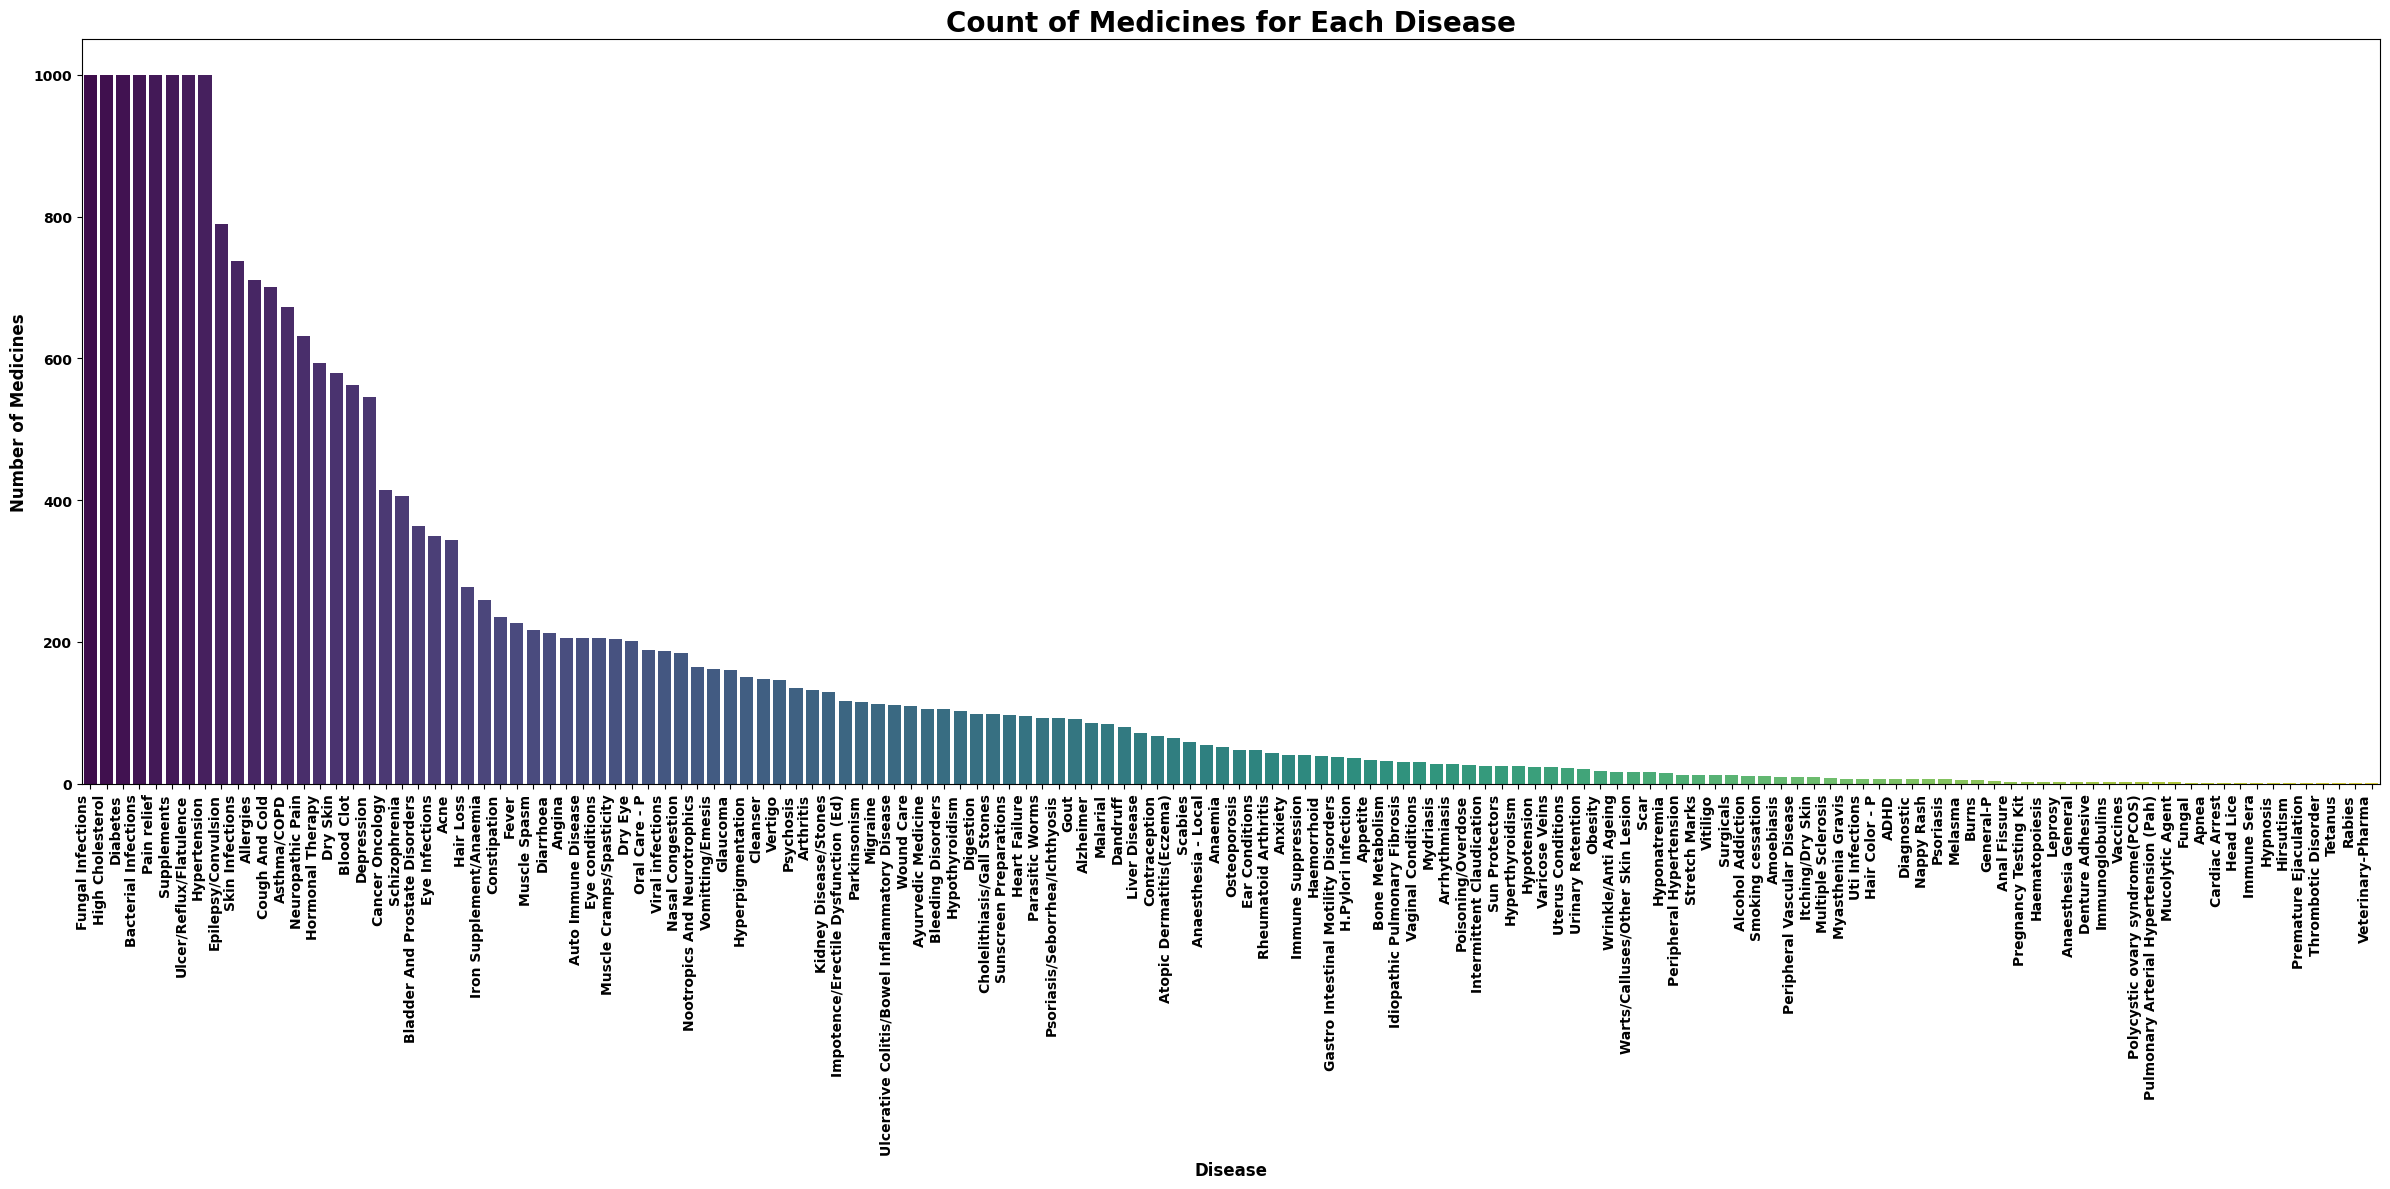

In [13]:

# Counting the number of medicines for each disease
disease_counts = data['Disease'].value_counts()

# Sorting the disease counts in descending order
disease_counts = disease_counts.sort_values(ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')

plt.xlabel('Disease', fontsize=12, weight='bold', color='black')
plt.ylabel('Number of Medicines', fontsize=12, weight='bold', color='black')
plt.title('Count of Medicines for Each Disease', fontsize=20, weight='bold', color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, weight='bold', color='black')
plt.yticks(fontsize=10, weight='bold', color='black')

plt.tight_layout()
plt.show()


# **Count of Medicines that Require or Do Not Require Prescription**

<ipython-input-14-3218043db870>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rx_required_counts.index, y=rx_required_counts.values, palette='viridis')


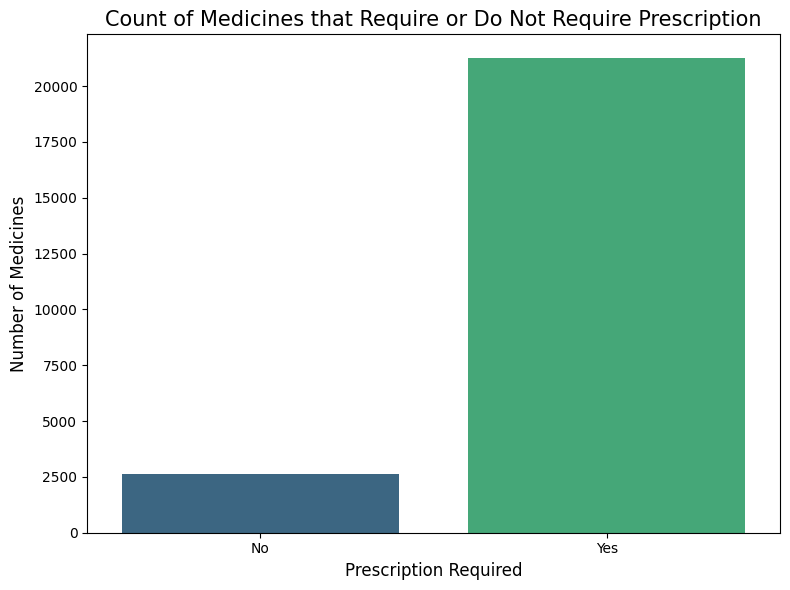

In [14]:
# Count the number of medicines for each 'Rx Required' category
rx_required_counts = data['Rx Required'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=rx_required_counts.index, y=rx_required_counts.values, palette='viridis')

plt.xlabel('Prescription Required', fontsize=12)
plt.ylabel('Number of Medicines', fontsize=12)
plt.title('Count of Medicines that Require or Do Not Require Prescription', fontsize=15)
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()


# **"Analysis of Medicine Counts for Diseases Based on Prescription Requirement"**

<ipython-input-15-b9dae12666ad>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_true, ax=axes[0, 0], palette='Blues')
<ipython-input-15-b9dae12666ad>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_true, ax=axes[0, 1], palette='Blues_d')
<ipython-input-15-b9dae12666ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_false, ax=axes[1, 0], palette='Oranges')
<ipython-input-15

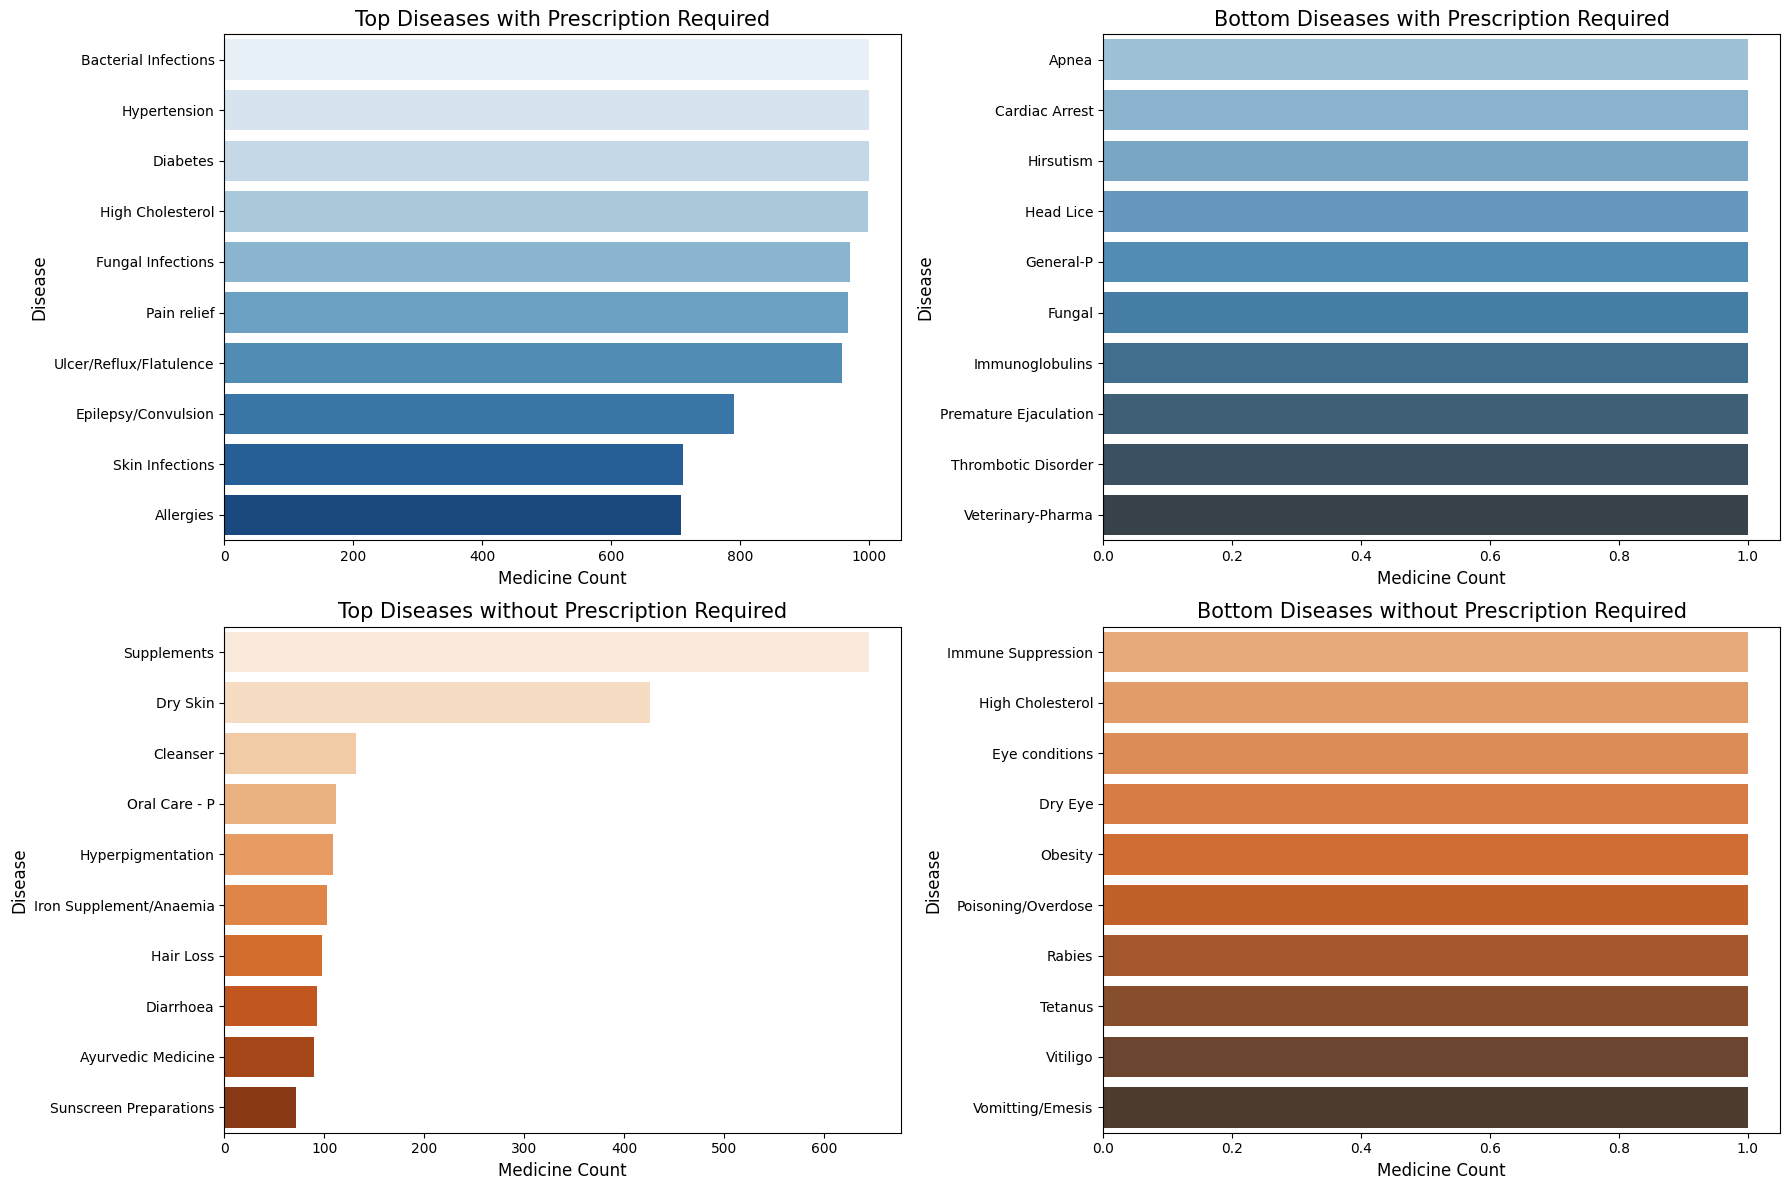

In [15]:
# Group by Disease and Rx Required for  geting the count of medicines for each combination
disease_rx_counts = data.groupby(['Disease', 'Rx Required']).size().reset_index(name='Medicine Count')

# Separating diseases with Rx Required as True and False
disease_rx_true = disease_rx_counts[disease_rx_counts['Rx Required'] == True].sort_values(by='Medicine Count', ascending=False)
disease_rx_false = disease_rx_counts[disease_rx_counts['Rx Required'] == False].sort_values(by='Medicine Count', ascending=False)

# Top 10 diseases for Rx Required = True
top_diseases_rx_true = disease_rx_true.head(10)

# Bottom 10 diseases for Rx Required = True
bottom_diseases_rx_true = disease_rx_true.tail(10)

# Top 10 diseases for Rx Required = False
top_diseases_rx_false = disease_rx_false.head(10)

# Bottom 10 diseases for Rx Required = False
bottom_diseases_rx_false = disease_rx_false.tail(10)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_true, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Top Diseases with Prescription Required', fontsize=15)
axes[0, 0].set_xlabel('Medicine Count', fontsize=12)
axes[0, 0].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_true, ax=axes[0, 1], palette='Blues_d')
axes[0, 1].set_title('Bottom Diseases with Prescription Required', fontsize=15)
axes[0, 1].set_xlabel('Medicine Count', fontsize=12)
axes[0, 1].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_false, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('Top Diseases without Prescription Required', fontsize=15)
axes[1, 0].set_xlabel('Medicine Count', fontsize=12)
axes[1, 0].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_false, ax=axes[1, 1], palette='Oranges_d')
axes[1, 1].set_title('Bottom Diseases without Prescription Required', fontsize=15)
axes[1, 1].set_xlabel('Medicine Count', fontsize=12)
axes[1, 1].set_ylabel('Disease', fontsize=12)

plt.tight_layout()
plt.show()


# **Diseases with Highest Average Discount**

<ipython-input-16-0a75fe012354>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Disease', data=disease_discount_sorted, palette='coolwarm')


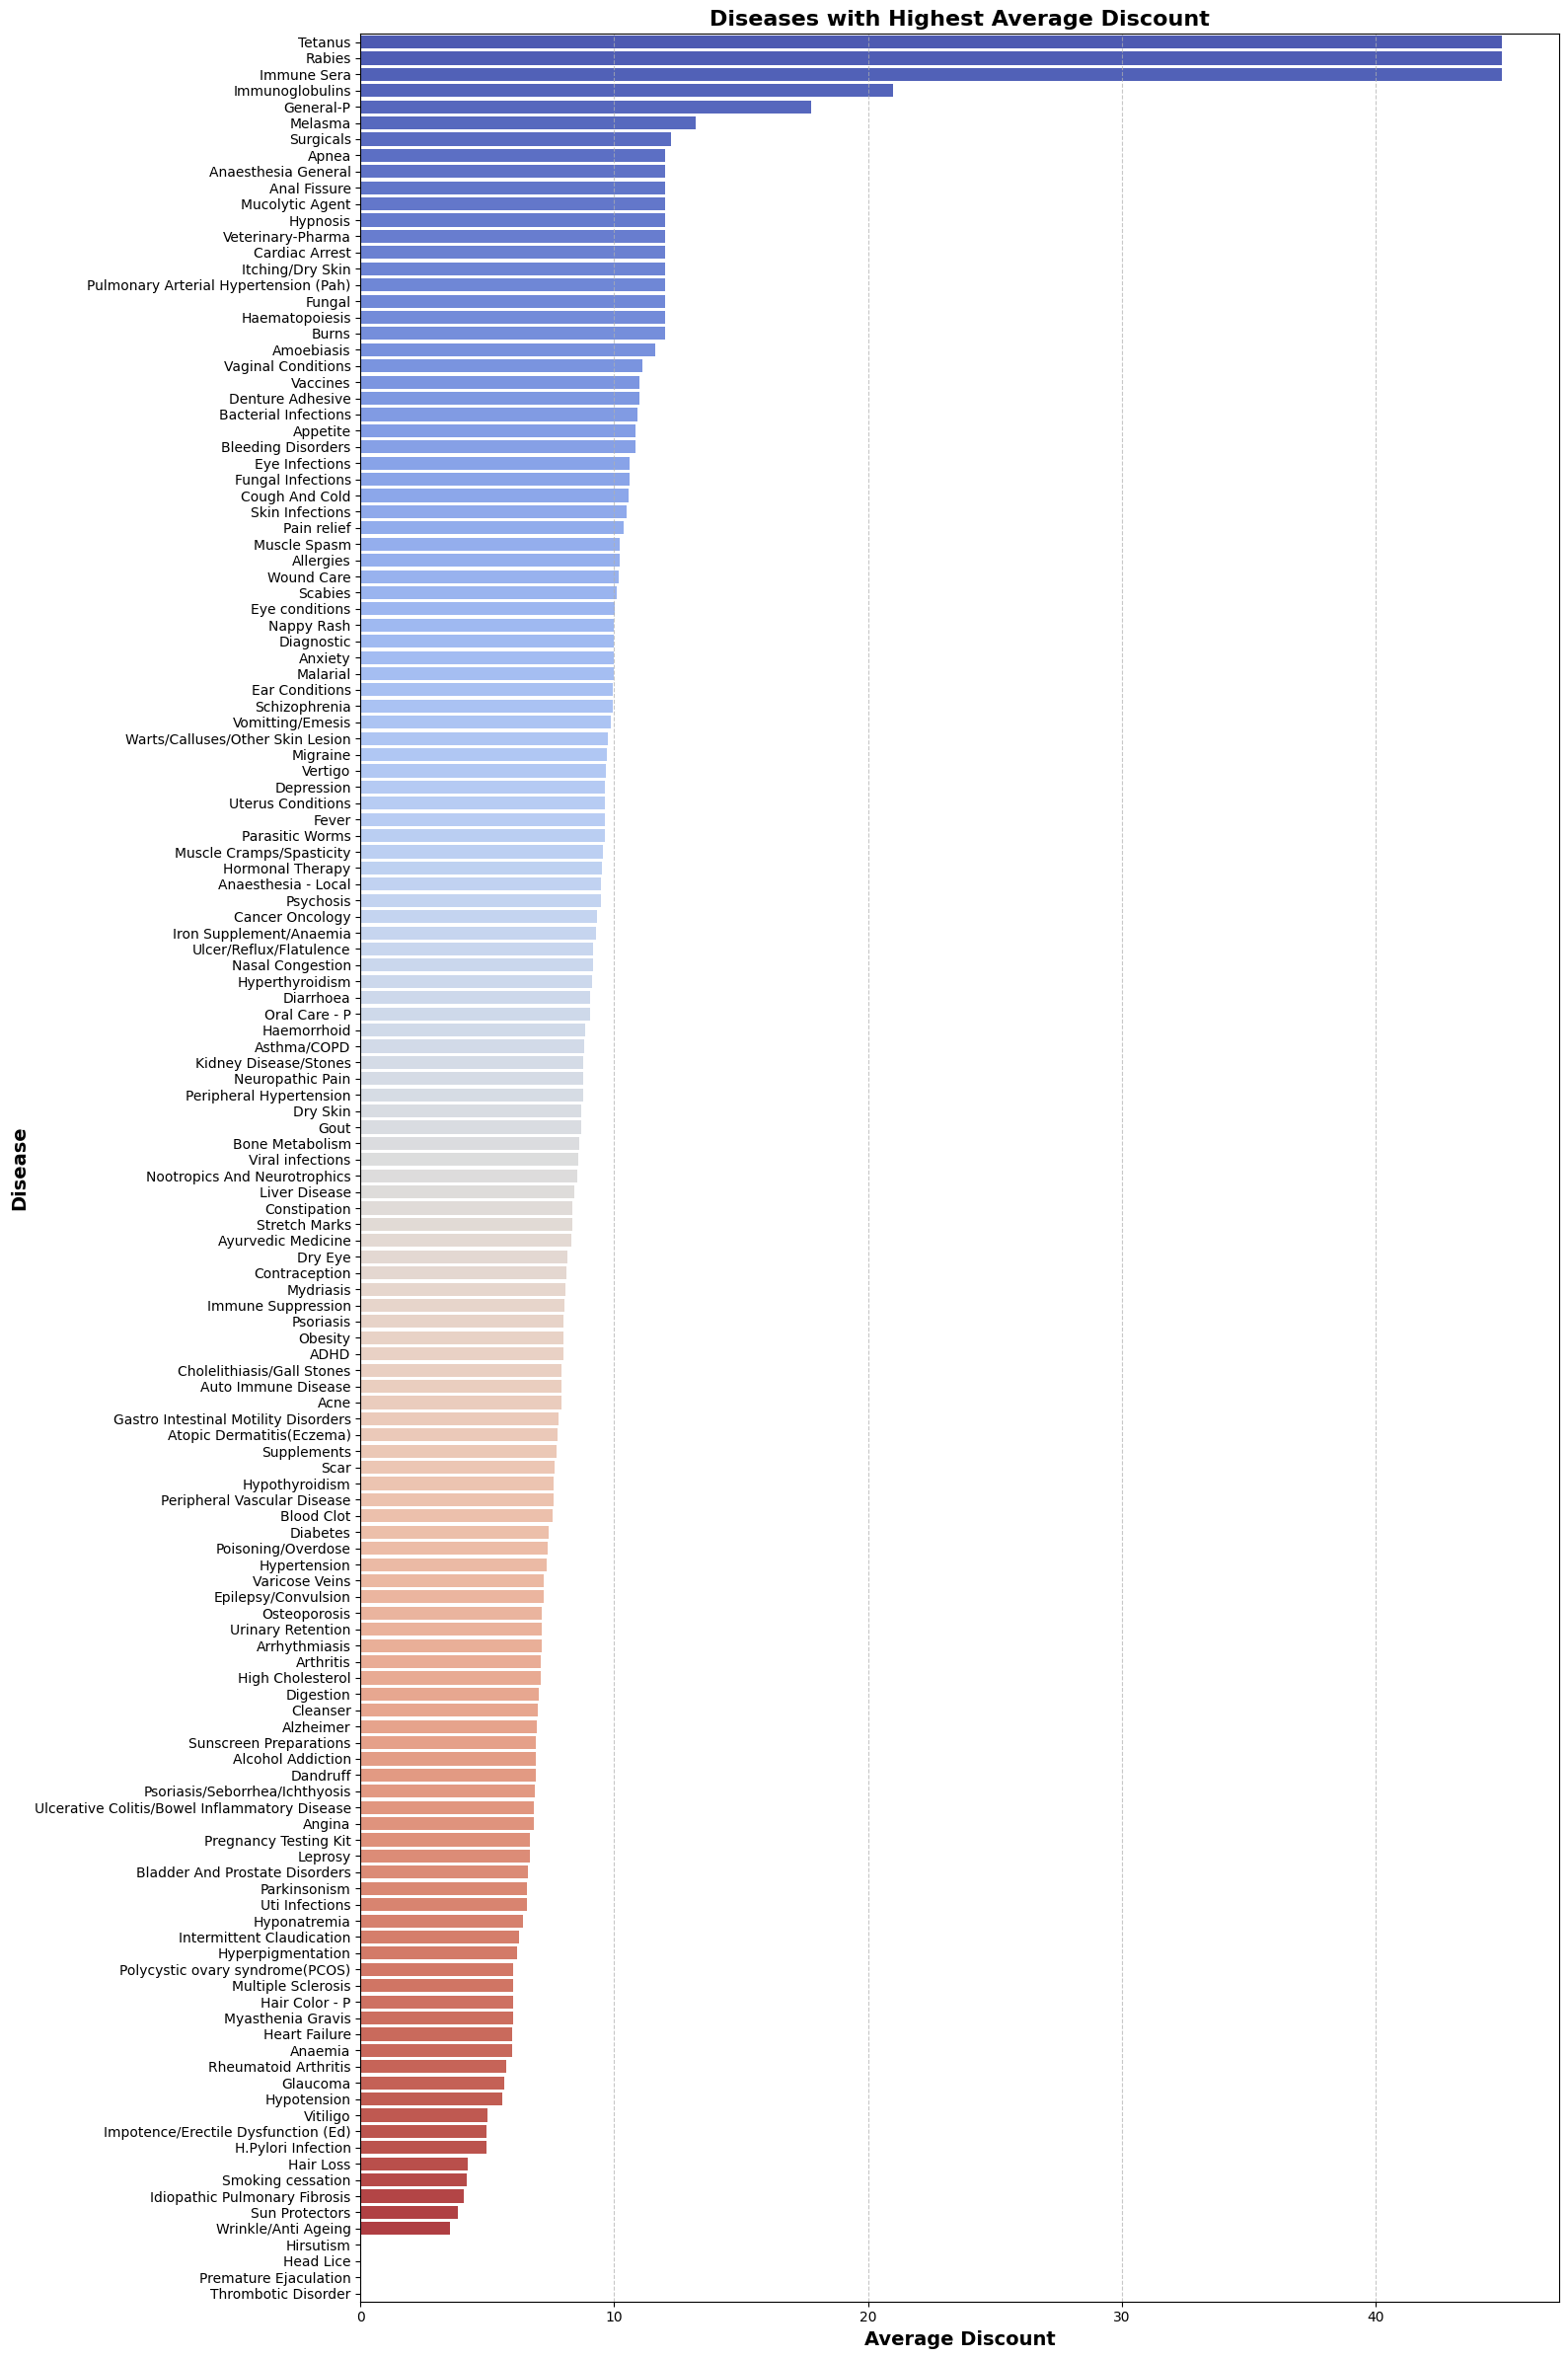

In [16]:


# Grouping by Disease and calculating the average Discount
disease_discount = data.groupby('Disease')['Discount'].mean().reset_index()

# Sorting the diseases by Discount in descending order
disease_discount_sorted = disease_discount.sort_values(by='Discount', ascending=False)

plt.figure(figsize=(16, 24))
sns.barplot(x='Discount', y='Disease', data=disease_discount_sorted, palette='coolwarm')

plt.xlabel('Average Discount', fontsize=14, fontweight='bold')
plt.ylabel('Disease', fontsize=14, fontweight='bold')
plt.title('Diseases with Highest Average Discount', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Top 10 Manufacturers with Highest Average Discounts for Each Disease**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tablet Name                  23897 non-null  object 
 1   Disease                      23897 non-null  object 
 2   Rx Required                  23897 non-null  int64  
 3   Price                        23897 non-null  int64  
 4   Discount                     23897 non-null  int64  
 5   Country of Origin            23897 non-null  object 
 6   Manufacturer.1.1             23897 non-null  object 
 7   Tablet Info                  23897 non-null  object 
 8   gm per lotion                23896 non-null  float64
 9   Facewash. gm per tube        23897 non-null  int64  
 10  Spray ml per tube.1          23888 non-null  float64
 11  Ointment gm per tube.1       23897 non-null  int64  
 12  oral solution ml per tube.1  23897 non-null  int64  
 13  Cream gm per tub

# **Top 10 Manufacturers with Highest Average Discounts for Each Disease**

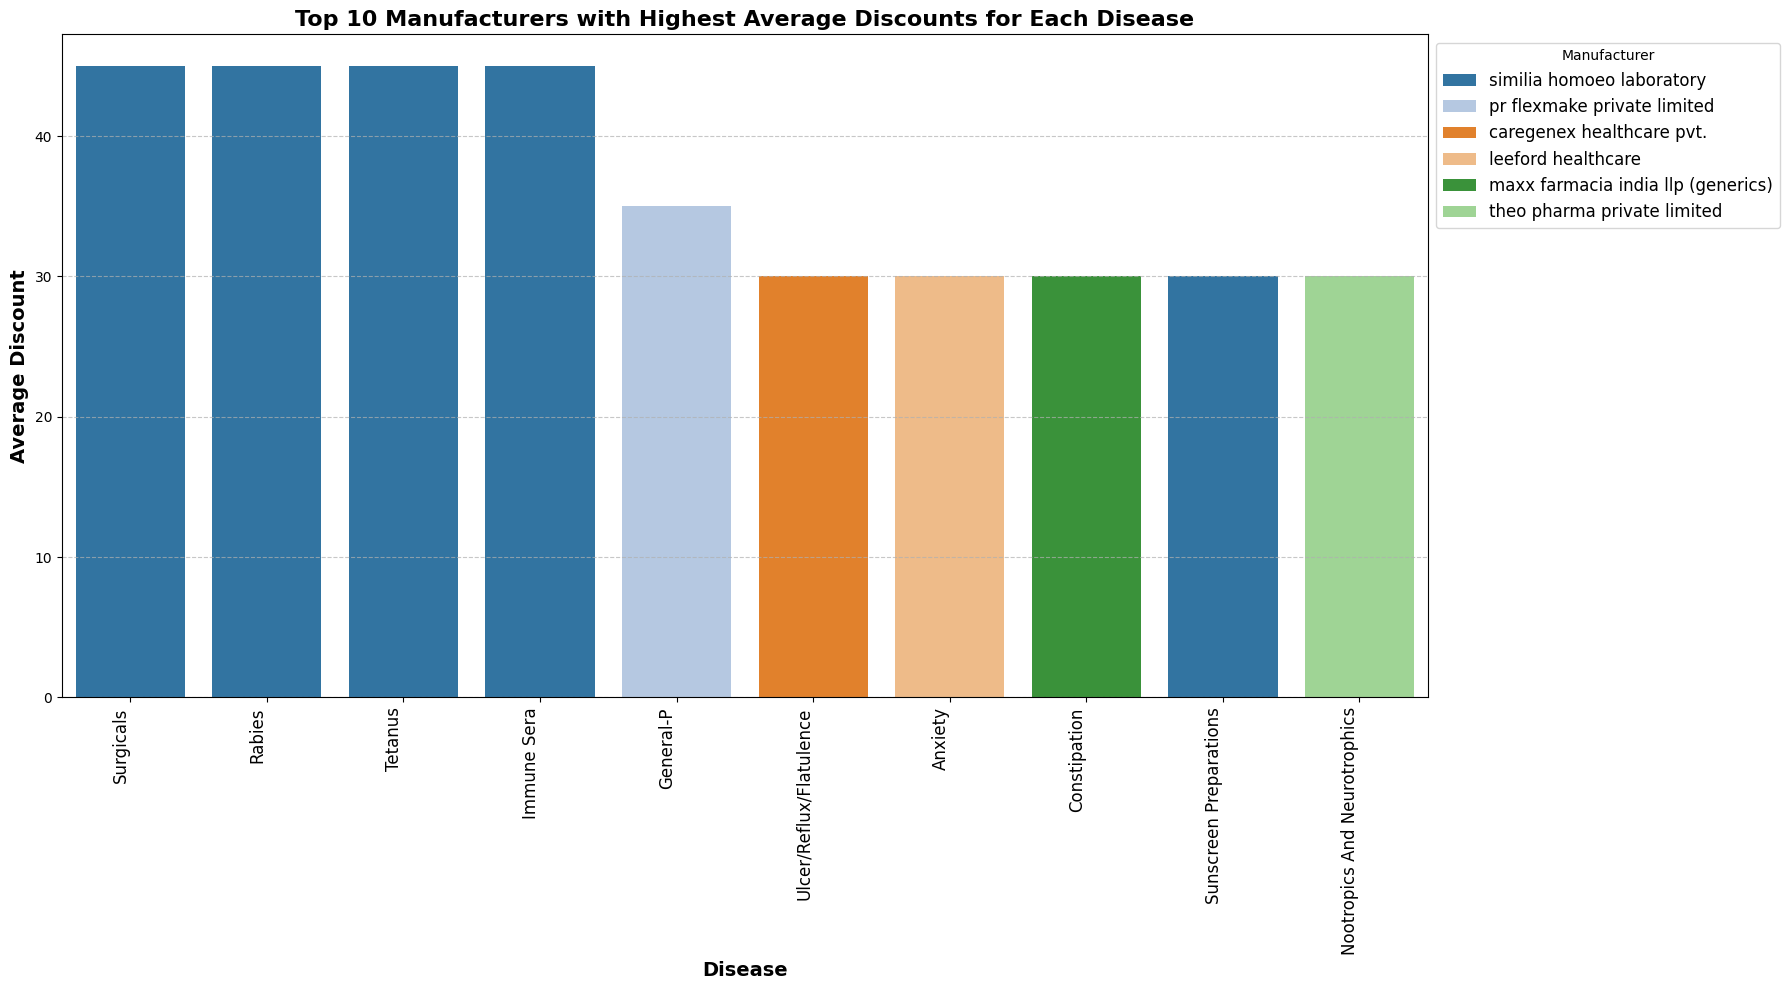

In [18]:


# Grouping by 'Disease' and 'Manufacturer', and calculating the average discount
disease_manufacturer_discount = data.groupby(['Disease', 'Manufacturer.1.1'])['Discount'].mean().reset_index()

# Sorting the data based on 'Discount' in descending order
sorted_discount = disease_manufacturer_discount.sort_values(by='Discount', ascending=False)

# Selecting the top 10 manufacturers with the highest discounts
top_10_discount = sorted_discount.head(10)

plt.figure(figsize=(18, 10))
sns.barplot(x='Disease', y='Discount', hue='Manufacturer.1.1', data=top_10_discount, palette='tab20')

plt.xlabel('Disease', fontsize=14, fontweight='bold')
plt.ylabel('Average Discount', fontsize=14, fontweight='bold')
plt.title('Top 10 Manufacturers with Highest Average Discounts for Each Disease', fontsize=16, fontweight='bold')

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **Average Price by Disease**

<ipython-input-19-37a6e060948e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Disease', data=average_price_by_disease_sorted, palette='viridis')


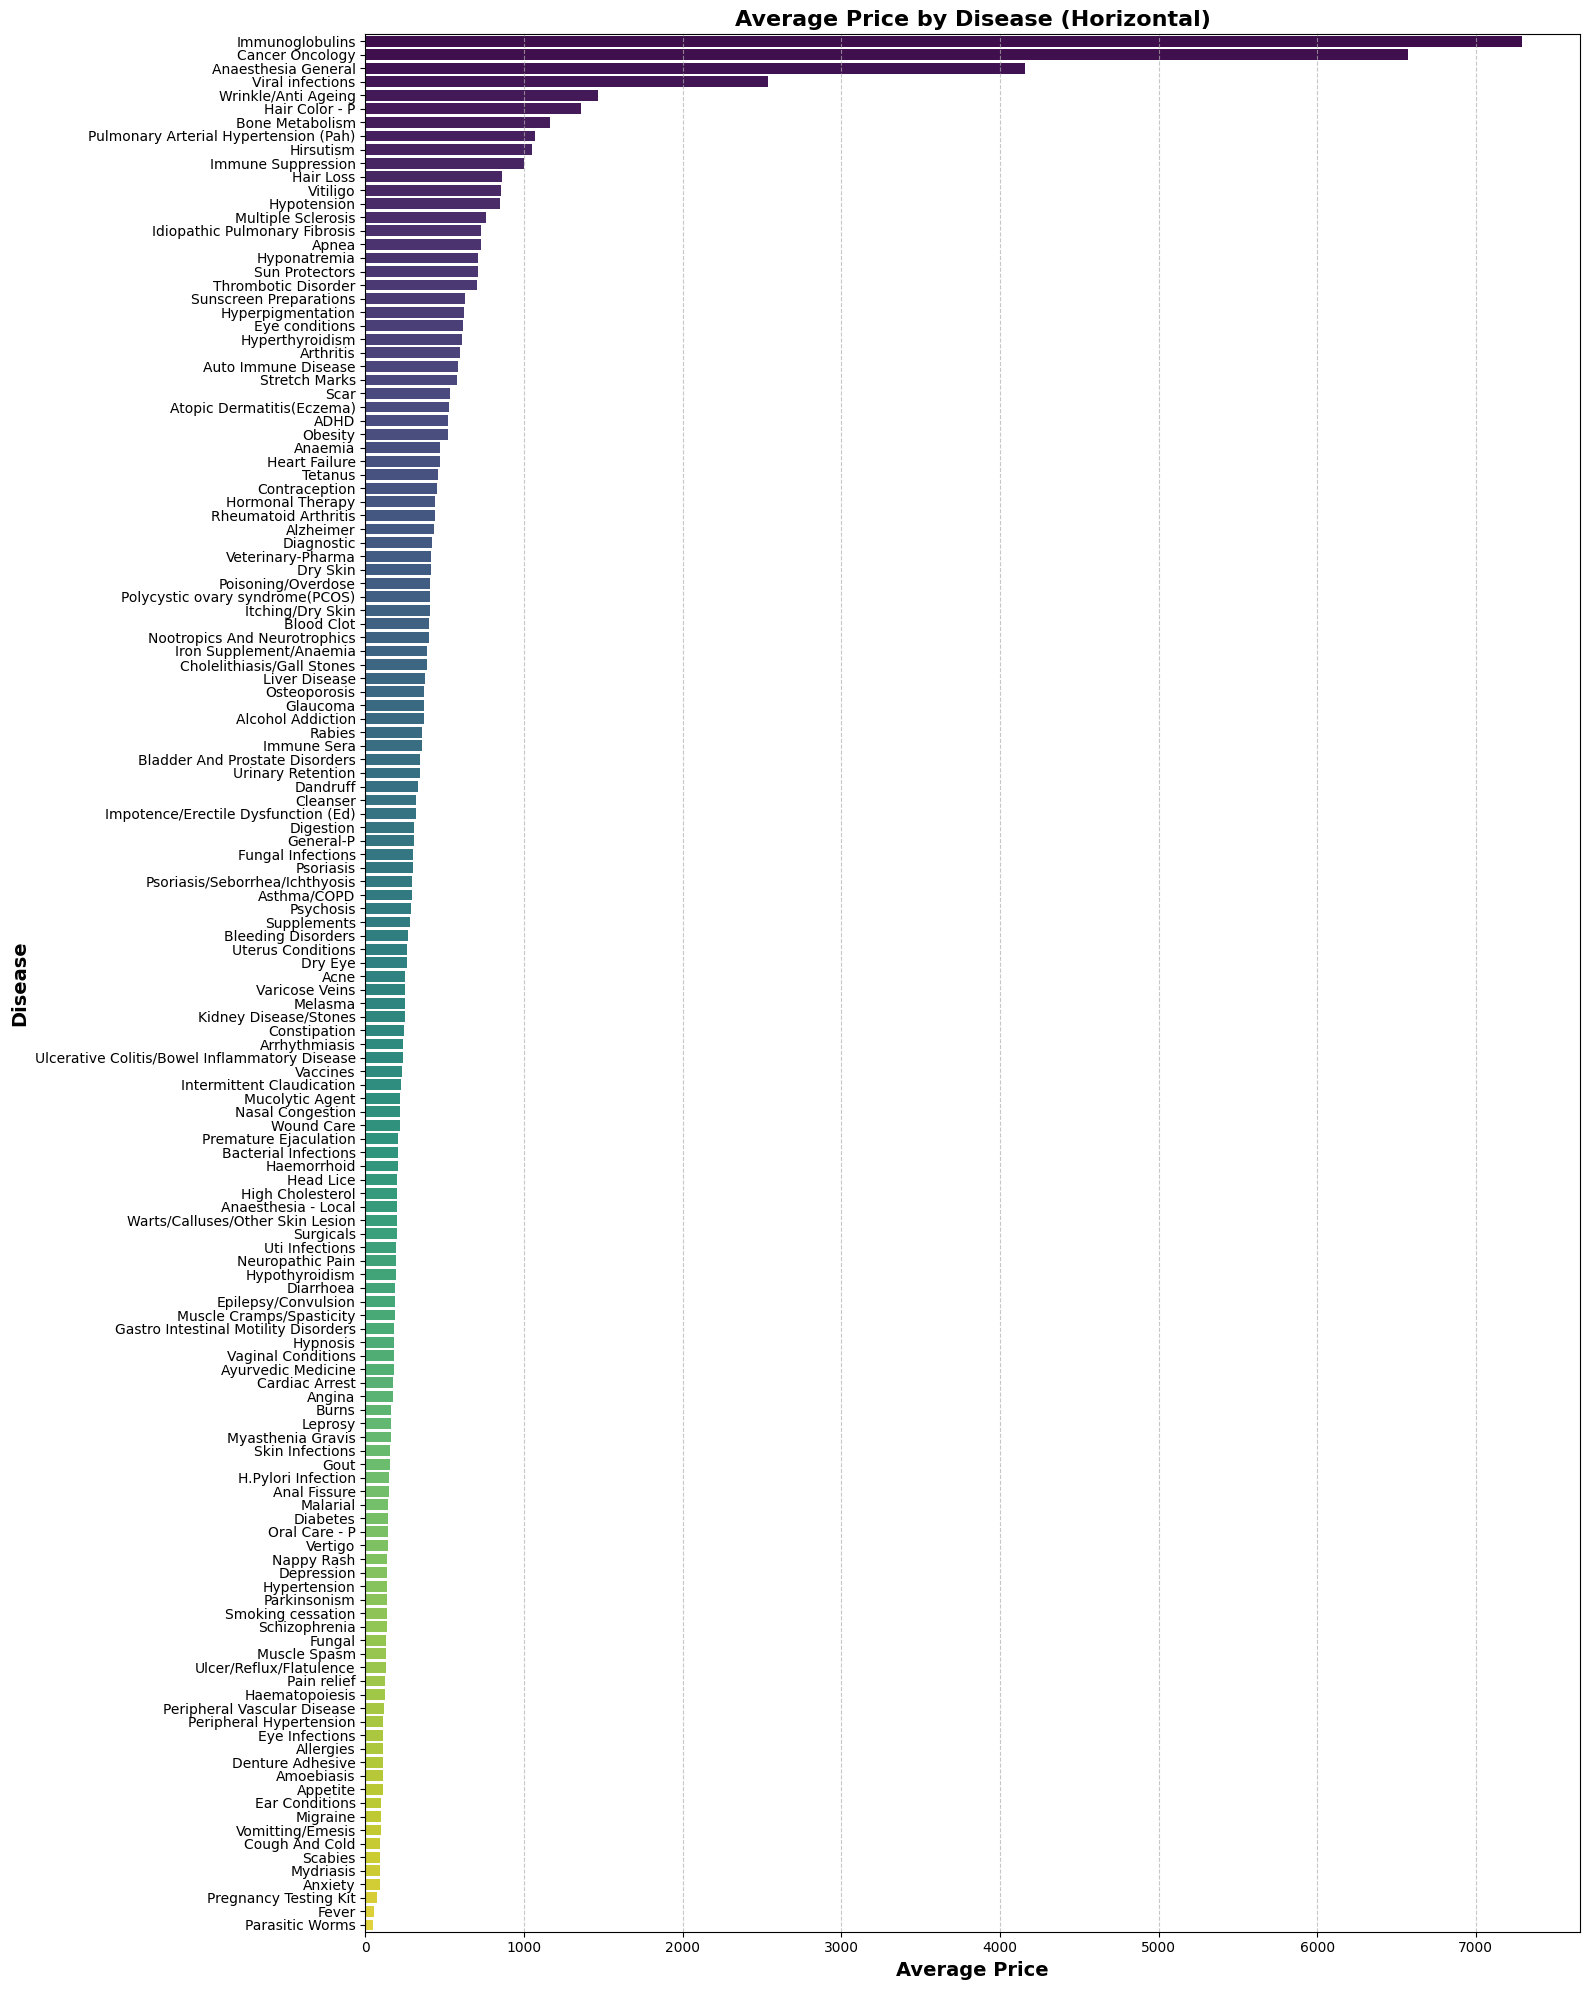

In [19]:

# Grouping by 'Disease' and calculating the average price for each disease
average_price_by_disease = data.groupby('Disease')['Price'].mean().reset_index()

# Sorting the results in descending order to show the diseases with the highest average price
average_price_by_disease_sorted = average_price_by_disease.sort_values(by='Price', ascending=False)

plt.figure(figsize=(16, 20))
sns.barplot(x='Price', y='Disease', data=average_price_by_disease_sorted, palette='viridis')

plt.xlabel('Average Price', fontsize=14, fontweight='bold')
plt.ylabel('Disease', fontsize=14, fontweight='bold')
plt.title('Average Price by Disease (Horizontal)', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **Comparison of Average Price and Discount by Country of Origin**

<ipython-input-20-99a53c94b223>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Price', data=country_price_discount, palette='Blues_d', ax=axes[0])
<ipython-input-20-99a53c94b223>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Discount', data=country_price_discount, palette='Oranges_d', ax=axes[1])


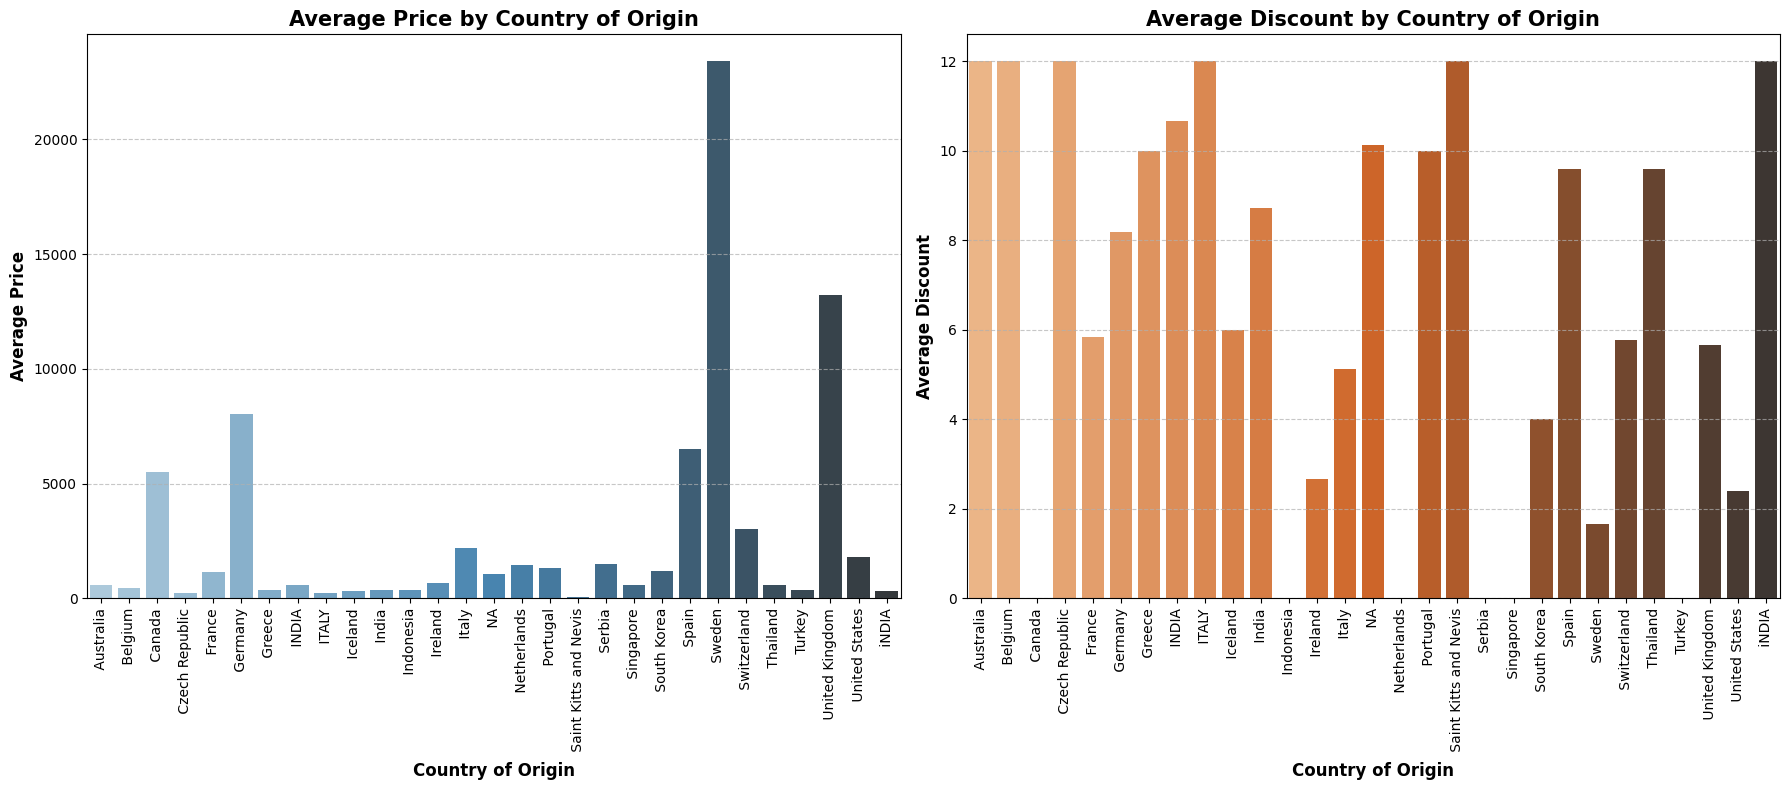

In [20]:
country_price_discount = data.groupby('Country of Origin')[['Price', 'Discount']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

sns.barplot(x='Country of Origin', y='Price', data=country_price_discount, palette='Blues_d', ax=axes[0])
axes[0].set_xlabel('Country of Origin', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Price', fontsize=12, fontweight='bold')
axes[0].set_title('Average Price by Country of Origin', fontsize=15, fontweight='bold')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x='Country of Origin', y='Discount', data=country_price_discount, palette='Oranges_d', ax=axes[1])
axes[1].set_xlabel('Country of Origin', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Discount', fontsize=12, fontweight='bold')
axes[1].set_title('Average Discount by Country of Origin', fontsize=15, fontweight='bold')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# **Analysis of the Most Frequently Occurring Tablet Info Entries**

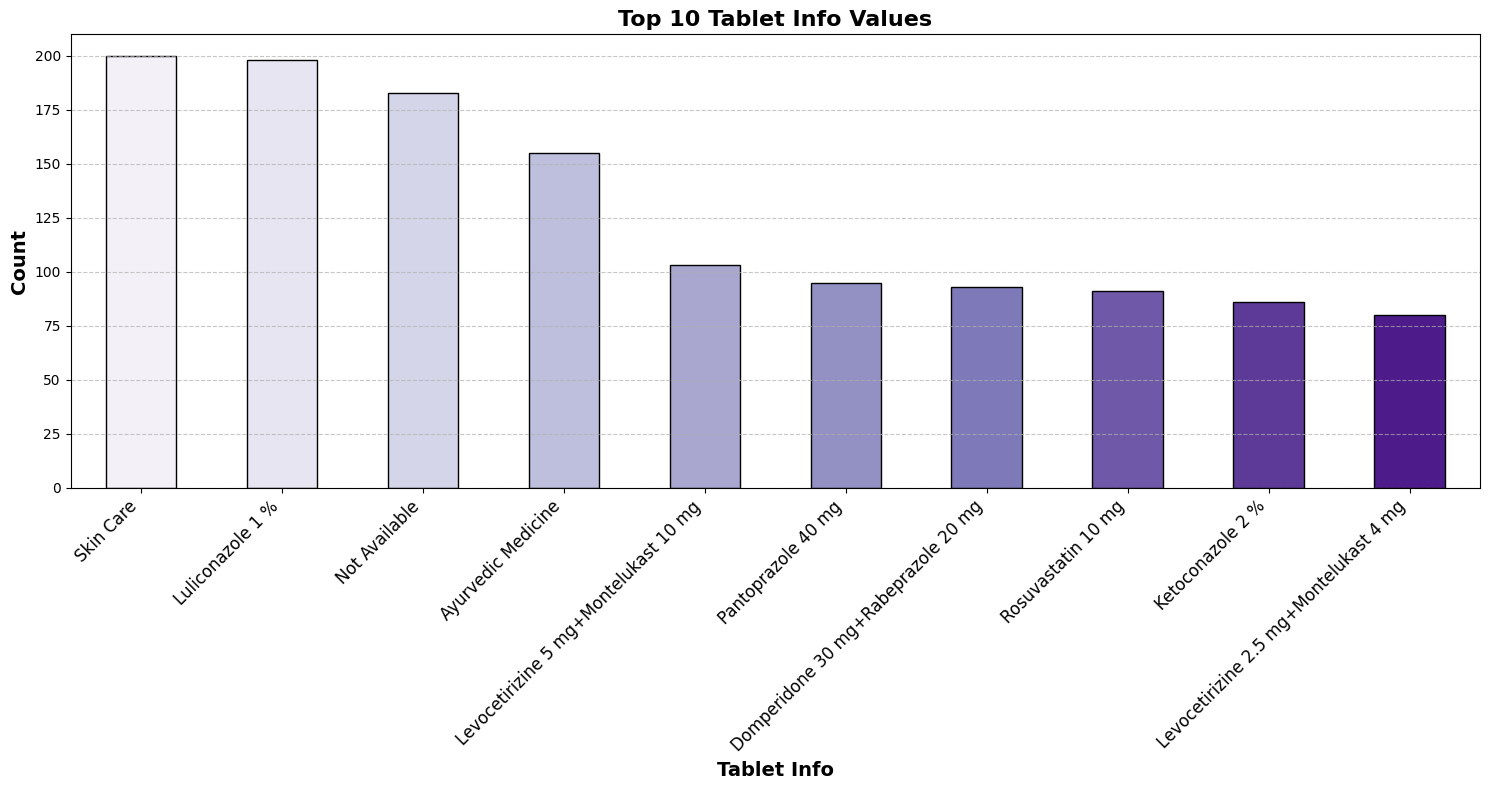

In [21]:
# extracting the top 10 most frequent values in 'Tablet Info'
top_10_tablet_info = data['Tablet Info'].value_counts().head(10)
# Plotting the top 10 Tablet Info values
plt.figure(figsize=(15, 8))
top_10_tablet_info.plot(kind='bar', color=sns.color_palette("Purples", 10), edgecolor='black')
plt.xlabel('Tablet Info', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Top 10 Tablet Info Values', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# **Distribution of Tablet Counts by Country of Origin and Disease**

In [22]:
# Grouping data by Country of Origin and Disease, counting tablets
disease_table = data.groupby(['Country of Origin', 'Disease'])['Tablet Name'].count().reset_index()

# Renaming columns for clarity
disease_table.columns = ['Country of Origin', 'Disease', 'Count of Tablets']

# Sorting by Count of Tablets in descending order
disease_table = disease_table.sort_values(['Count of Tablets'], ascending=False)

from tabulate import tabulate

# Converting DataFrame to a formatted table
print(tabulate(disease_table, headers='keys', tablefmt='grid', showindex=False))


+-----------------------+-----------------------------------------------+--------------------+
| Country of Origin     | Disease                                       |   Count of Tablets |
+=======================+===============================================+====================+
| India                 | Supplements                                   |               1000 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Hypertension                                  |                999 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Pain relief                                   |                999 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Bacterial Infections                          |                998 |
+-----------------------+-------------------------

# **Correlation Analysis: Price vs. Discount with Regression Trend**

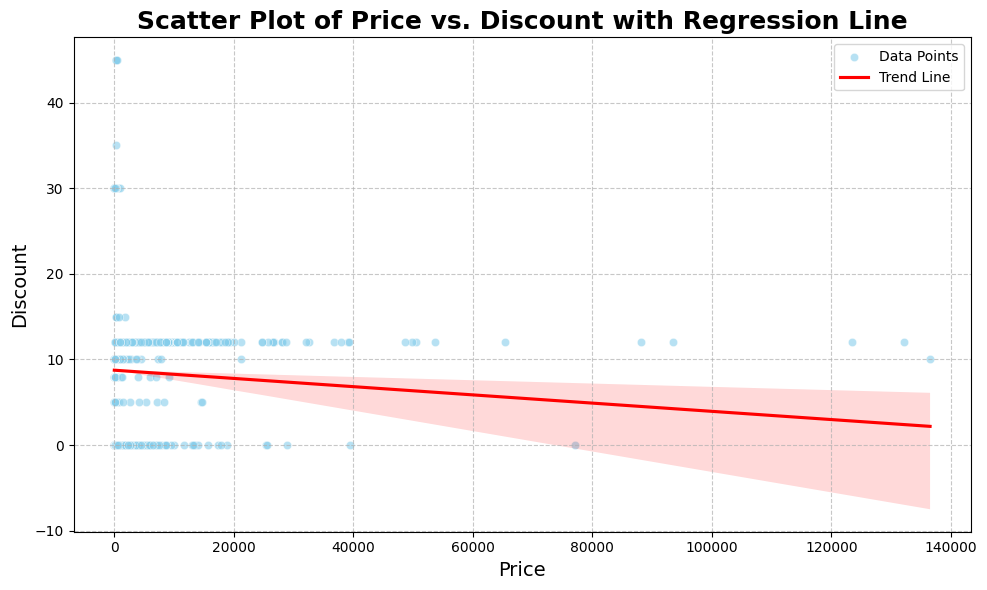

In [23]:

# plotting Scatter plot with regression line to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Discount', data=data, color='skyblue', alpha=0.6, label='Data Points')
# Adding regression line
sns.regplot(x='Price', y='Discount', data=data, scatter=False, color='red', label='Trend Line')
plt.title('Scatter Plot of Price vs. Discount with Regression Line', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Discount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# **Evaluating Countries Based on Discount-to-Price Ratio for Best Value**

Best Value for Money Country:   Saint Kitts and Nevis
Average Price:  68.0
Average Discount:  12.0
Value Score:  0.17647058823529413


<ipython-input-24-af90a6a05b5c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Value_Score', data=average_values, palette='Blues_d')


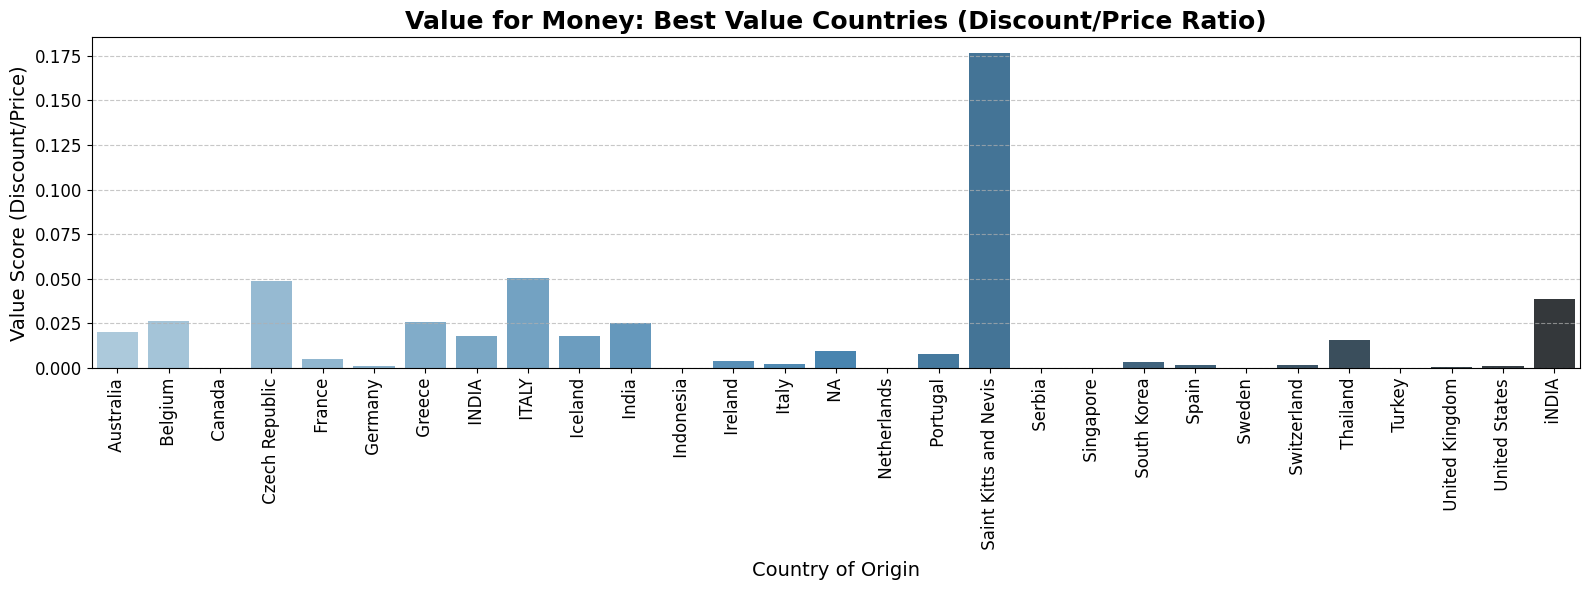

In [24]:
#  Calculating average Price and Discount for each Country of Origin
average_values = data.groupby('Country of Origin')[['Price', 'Discount']].mean().reset_index()

#Calculating the "Value Score"
average_values['Value_Score'] = average_values['Discount'] / average_values['Price']

#Identifying the country with the highest Value Score (Best Value for Money)
best_value_country = average_values.loc[average_values['Value_Score'].idxmax()]


print("Best Value for Money Country: ", best_value_country['Country of Origin'])
print("Average Price: ", best_value_country['Price'])
print("Average Discount: ", best_value_country['Discount'])
print("Value Score: ", best_value_country['Value_Score'])

plt.figure(figsize=(16, 6))

sns.barplot(x='Country of Origin', y='Value_Score', data=average_values, palette='Blues_d')

plt.title('Value for Money: Best Value Countries (Discount/Price Ratio)', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Value Score (Discount/Price)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **"Price and Discount Distribution Across Countries of Origin"**

<ipython-input-25-624ffbb419b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country of Origin', y='Price', data=data, palette='muted')


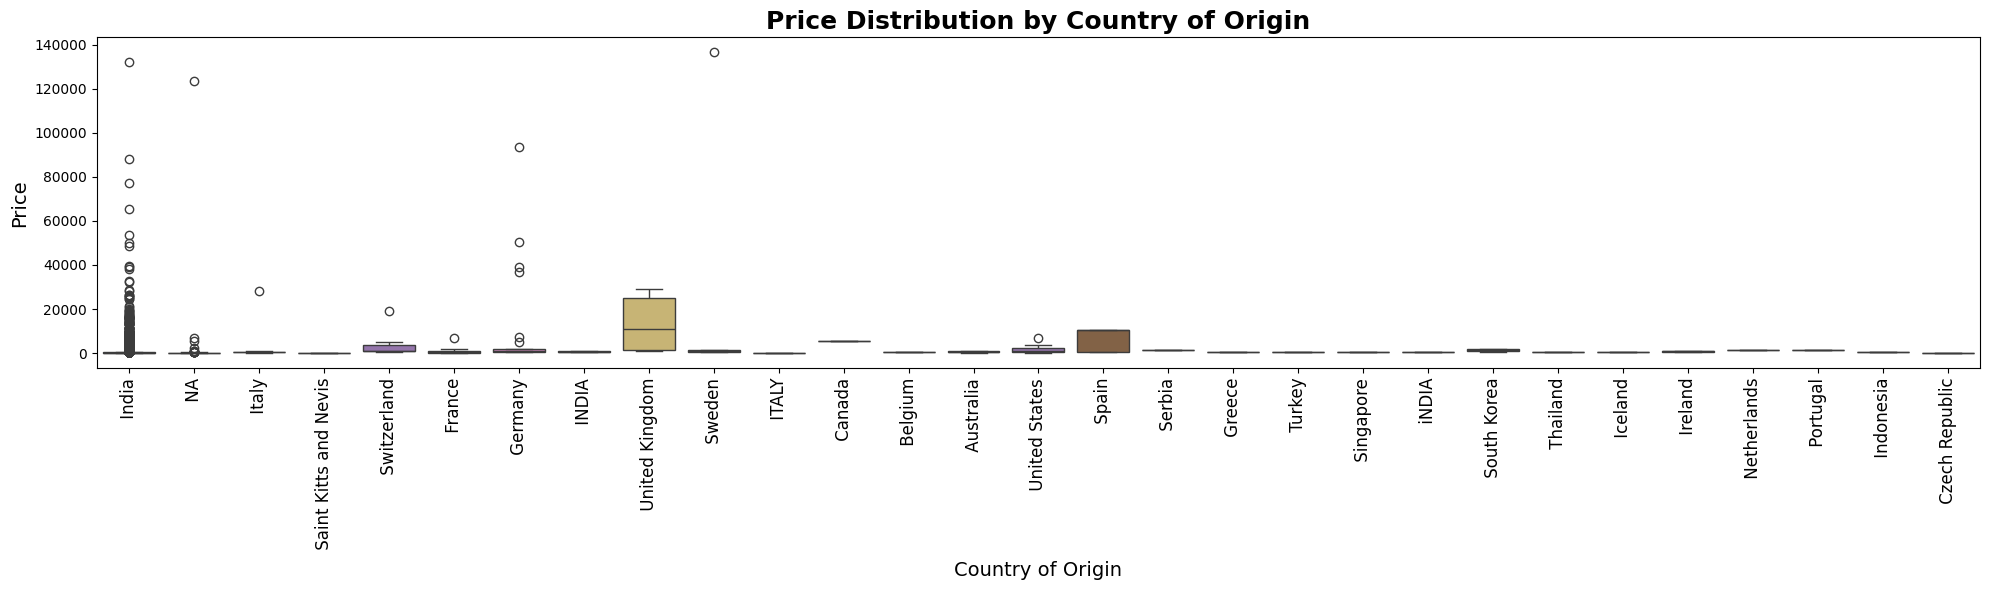

<ipython-input-25-624ffbb419b6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country of Origin', y='Discount', data=data, palette='muted')


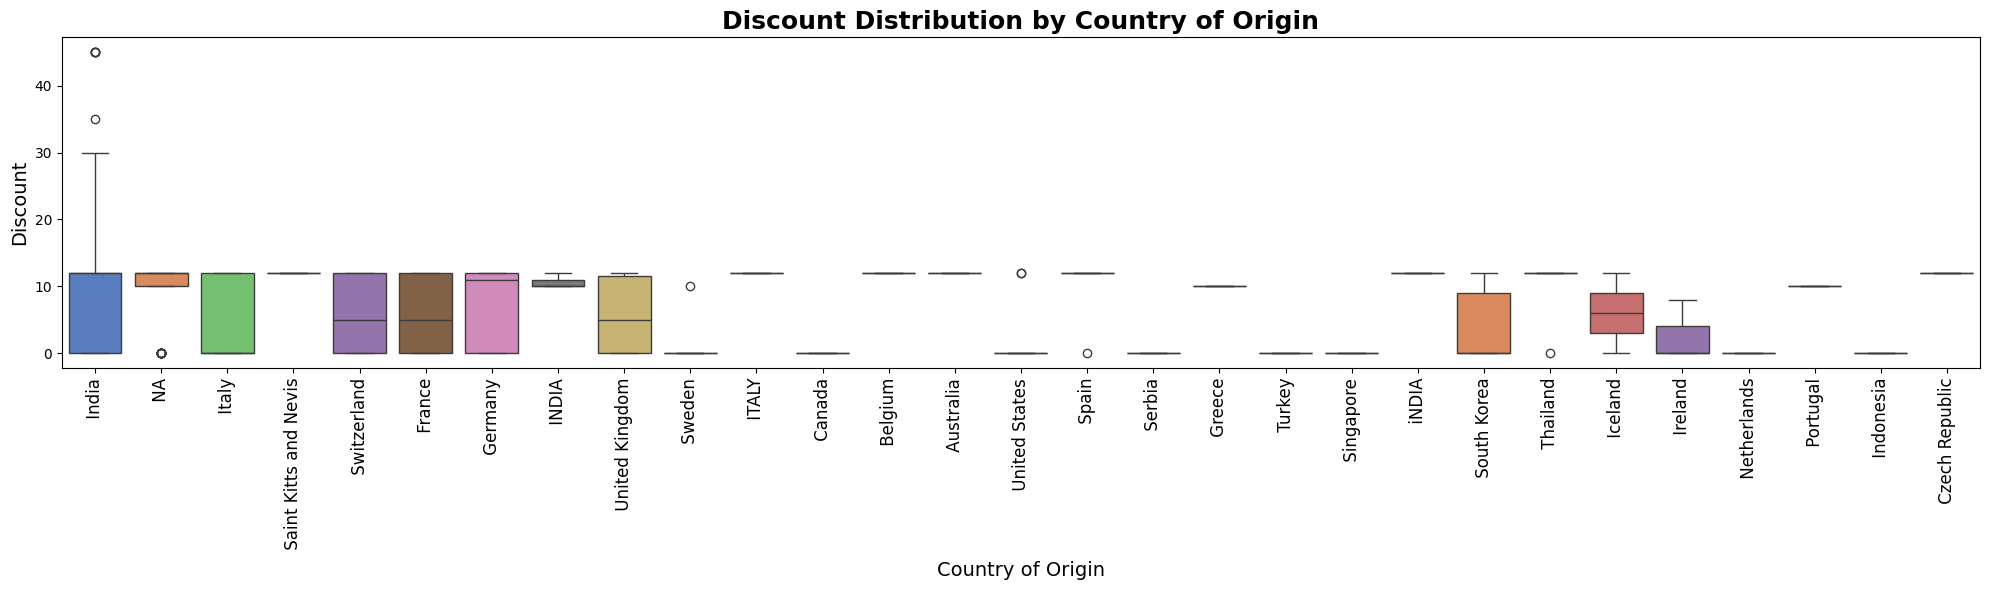

In [25]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Country of Origin', y='Price', data=data, palette='muted')
plt.title('Price Distribution by Country of Origin', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 6))
sns.boxplot(x='Country of Origin', y='Discount', data=data, palette='muted')
plt.title('Discount Distribution by Country of Origin', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Discount', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


# **Comparative Radar Chart of Price and Discount Across Countries**

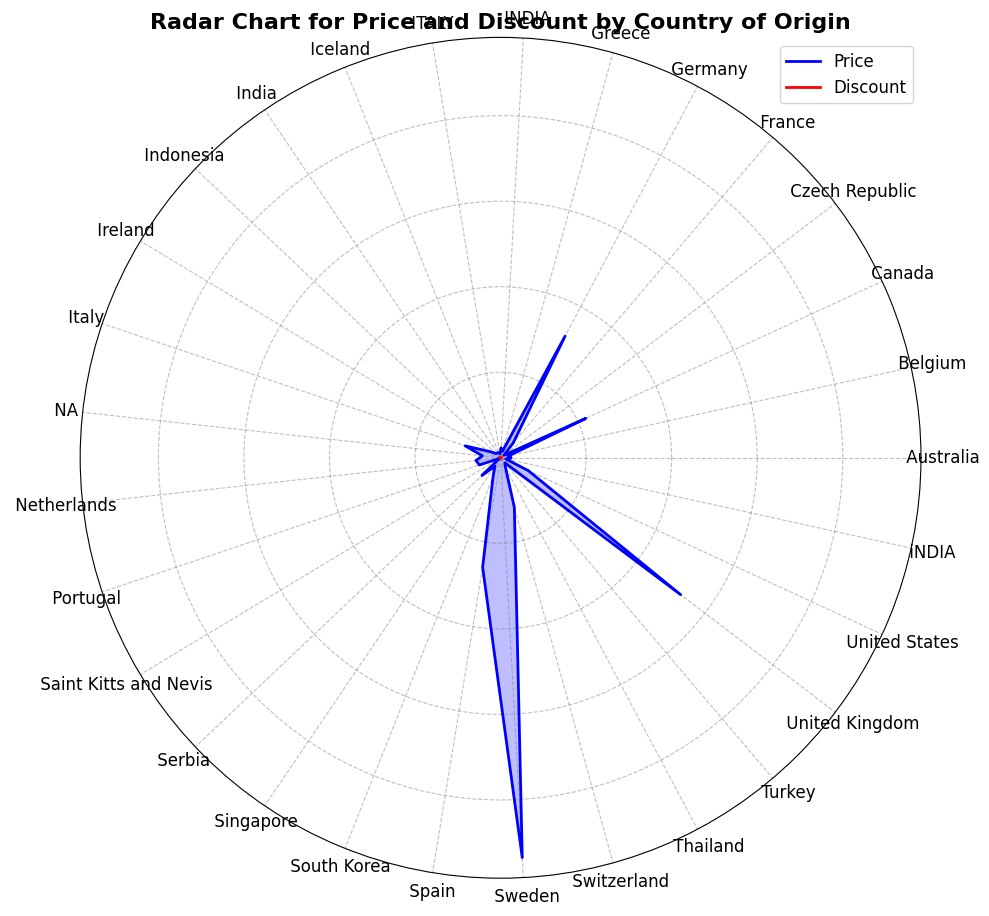

In [26]:

# Preparing data for radar chart
countries = average_values['Country of Origin'].tolist()
price = average_values['Price'].tolist()
discount = average_values['Discount'].tolist()

angles = np.linspace(0, 2 * np.pi, len(countries), endpoint=False).tolist()
price += price[:1]
discount += discount[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(10, 14), subplot_kw=dict(polar=True))
ax.plot(angles, price, color='blue', linewidth=2, label='Price')
ax.fill(angles, price, color='blue', alpha=0.25)
ax.plot(angles, discount, color='red', linewidth=2, label='Discount')
ax.fill(angles, discount, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(countries, fontsize=12, color='black', rotation=45)
ax.set_title('Radar Chart for Price and Discount by Country of Origin', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)

ax.grid(color='grey', linestyle='--', alpha=0.5)
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


# **Distribution of Price and Discount: Comparative Box Plot**

<ipython-input-27-ef2e03d74aec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Metric', x='Value', data=df_long, palette='Set2')


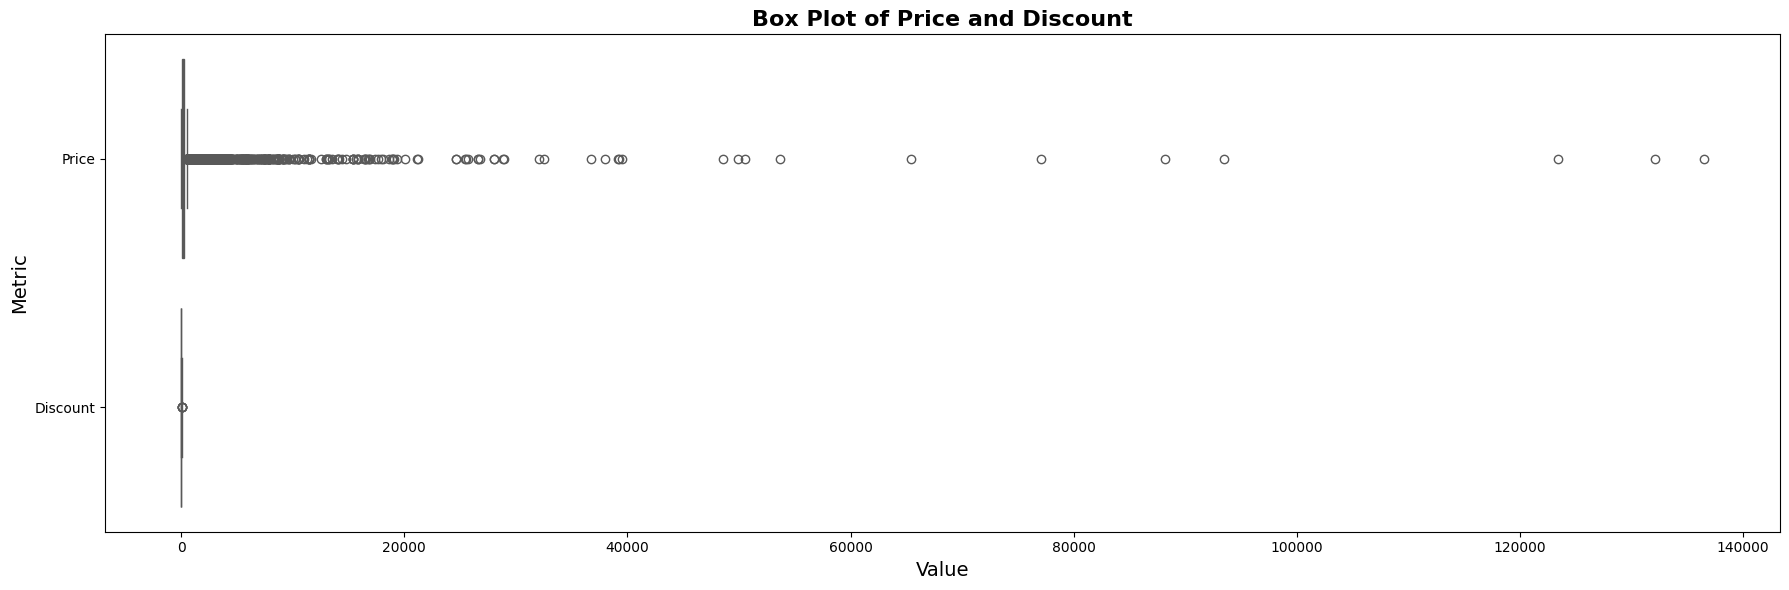

In [27]:

# Reshaping the data to a long format suitable for boxplot
df_long = data[['Price', 'Discount']].melt(var_name='Metric', value_name='Value')
plt.figure(figsize=(18, 6))
sns.boxplot(y='Metric', x='Value', data=df_long, palette='Set2')
plt.title('Box Plot of Price and Discount', fontsize=16, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Metric', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

In [29]:
data.rename(columns={'Merged': 'Comapny Type'}, inplace=True)


# **"Comparison of Price and Discount Across Different Company Types"**

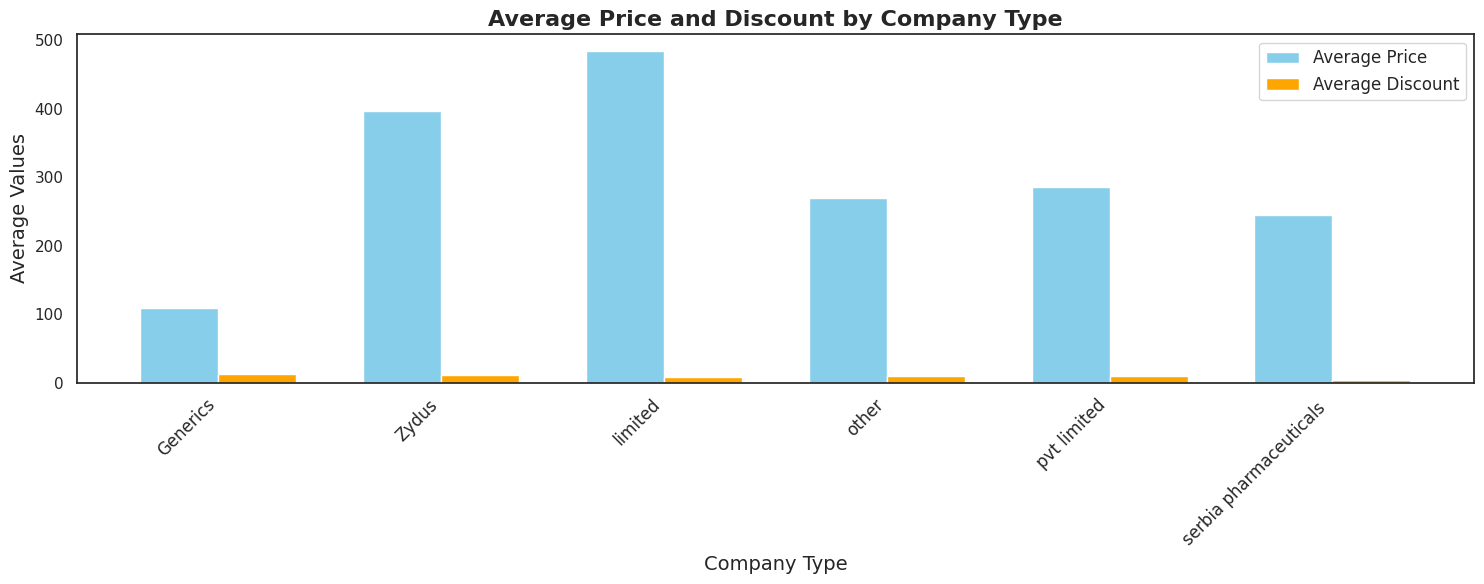

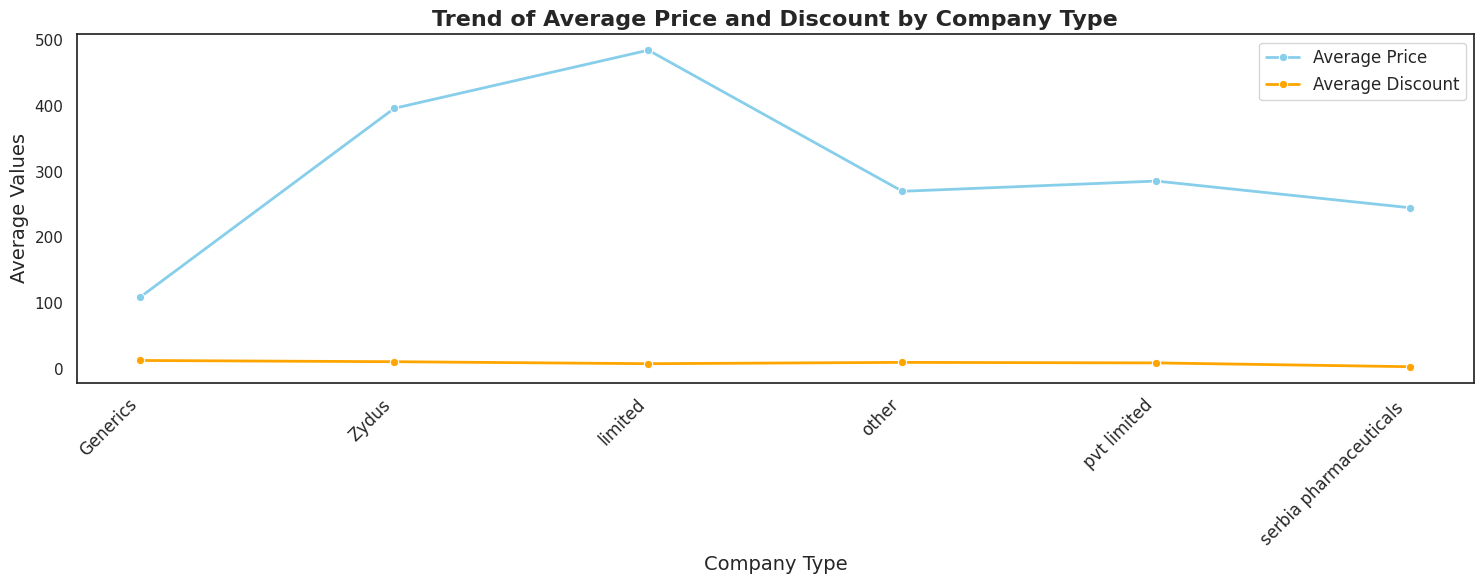

In [30]:
sns.set(style="white")
data['company type'] = data['Comapny Type'].str.replace(r'\(.*?\)', 'generics', regex=True).str.strip()
company_stats = data.groupby('Comapny Type')[['Price', 'Discount']].mean().reset_index()

# Grouped Bar Chart
plt.figure(figsize=(15, 6))
bar_width = 0.35
x = range(len(company_stats))
plt.bar(x, company_stats['Price'], width=bar_width, label='Average Price', color='skyblue')
plt.bar([p + bar_width for p in x], company_stats['Discount'], width=bar_width, label='Average Discount', color='orange')
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Average Values', fontsize=14)
plt.title('Average Price and Discount by Company Type', fontsize=16, fontweight='bold')
plt.xticks([p + bar_width / 2 for p in x], company_stats['Comapny Type'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=company_stats, x='Comapny Type', y='Price', marker='o', label='Average Price', color='skyblue', linewidth=2)
sns.lineplot(data=company_stats, x='Comapny Type', y='Discount', marker='o', label='Average Discount', color='orange', linewidth=2)
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Average Values', fontsize=14)
plt.title('Trend of Average Price and Discount by Company Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# **Comparison of Prescription (Rx) Requirements Across Company Types"**

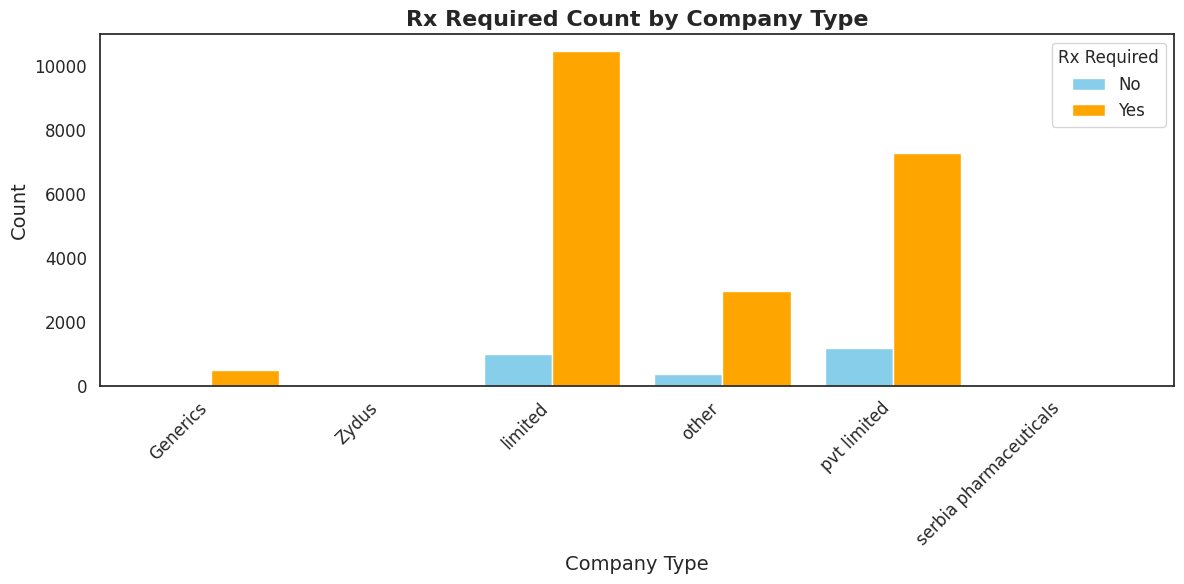

In [31]:
sns.set(style="white")
rx_counts = data.groupby(['company type', 'Rx Required']).size().reset_index(name='Count')
rx_pivot = rx_counts.pivot(index='company type', columns='Rx Required', values='Count').fillna(0)
ax = rx_pivot.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], width=0.8)
plt.title('Rx Required Count by Company Type', fontsize=16, fontweight='bold')
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)
plt.legend(title='Rx Required', labels=['No', 'Yes'], fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tablet Name                  23897 non-null  object 
 1   Disease                      23897 non-null  object 
 2   Rx Required                  23897 non-null  int64  
 3   Price                        23897 non-null  int64  
 4   Discount                     23897 non-null  int64  
 5   Country of Origin            23897 non-null  object 
 6   Manufacturer.1.1             23897 non-null  object 
 7   Tablet Info                  23897 non-null  object 
 8   gm per lotion                23896 non-null  float64
 9   Facewash. gm per tube        23897 non-null  int64  
 10  Spray ml per tube.1          23888 non-null  float64
 11  Ointment gm per tube.1       23897 non-null  int64  
 12  oral solution ml per tube.1  23897 non-null  int64  
 13  Cream gm per tub

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


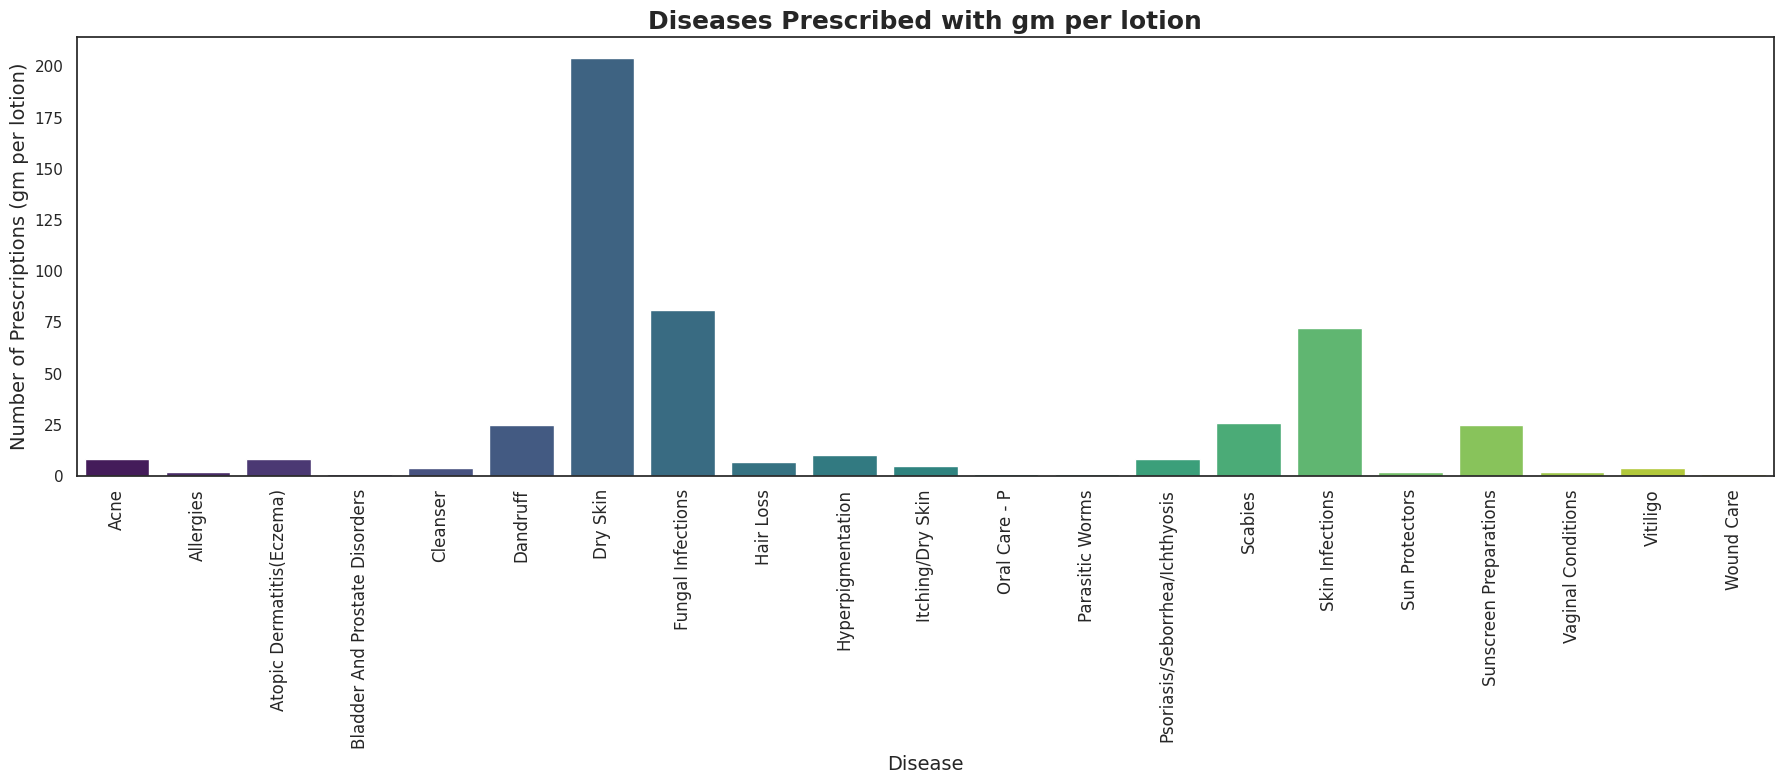

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


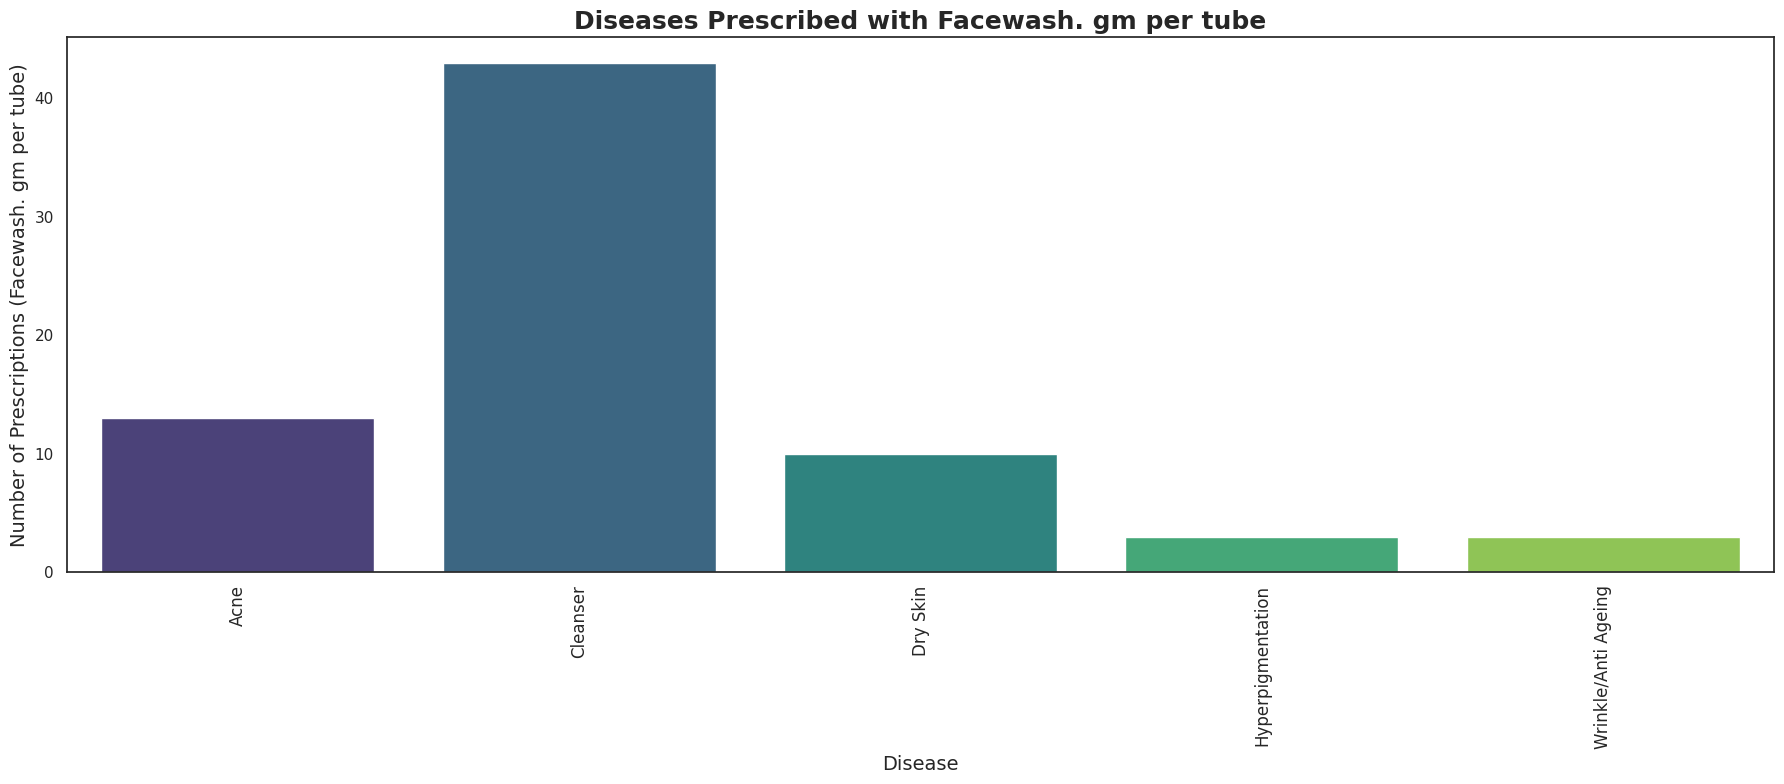

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


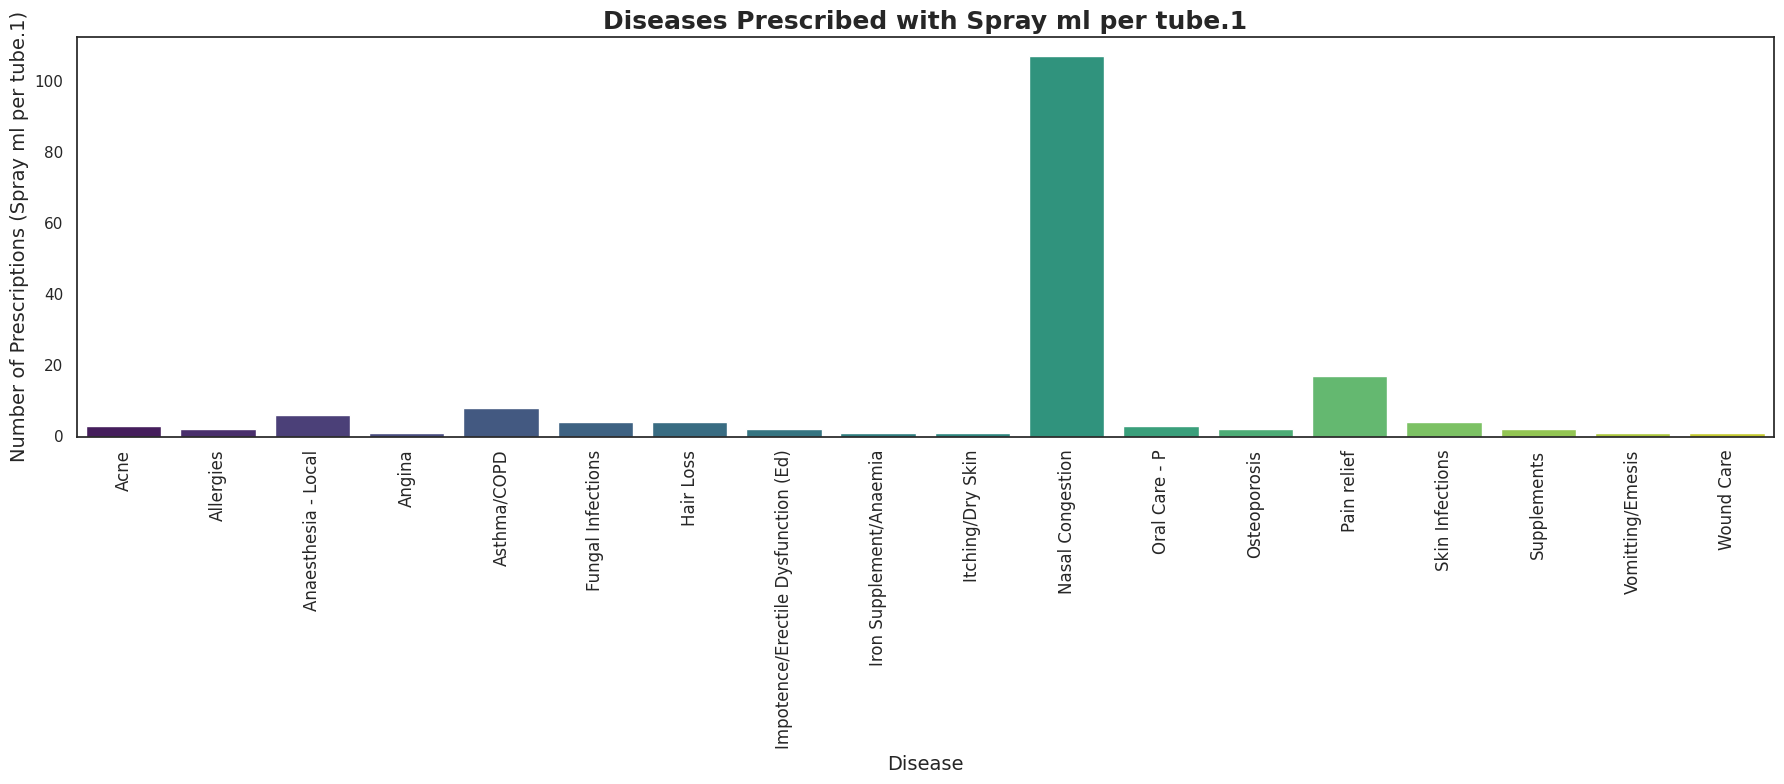

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


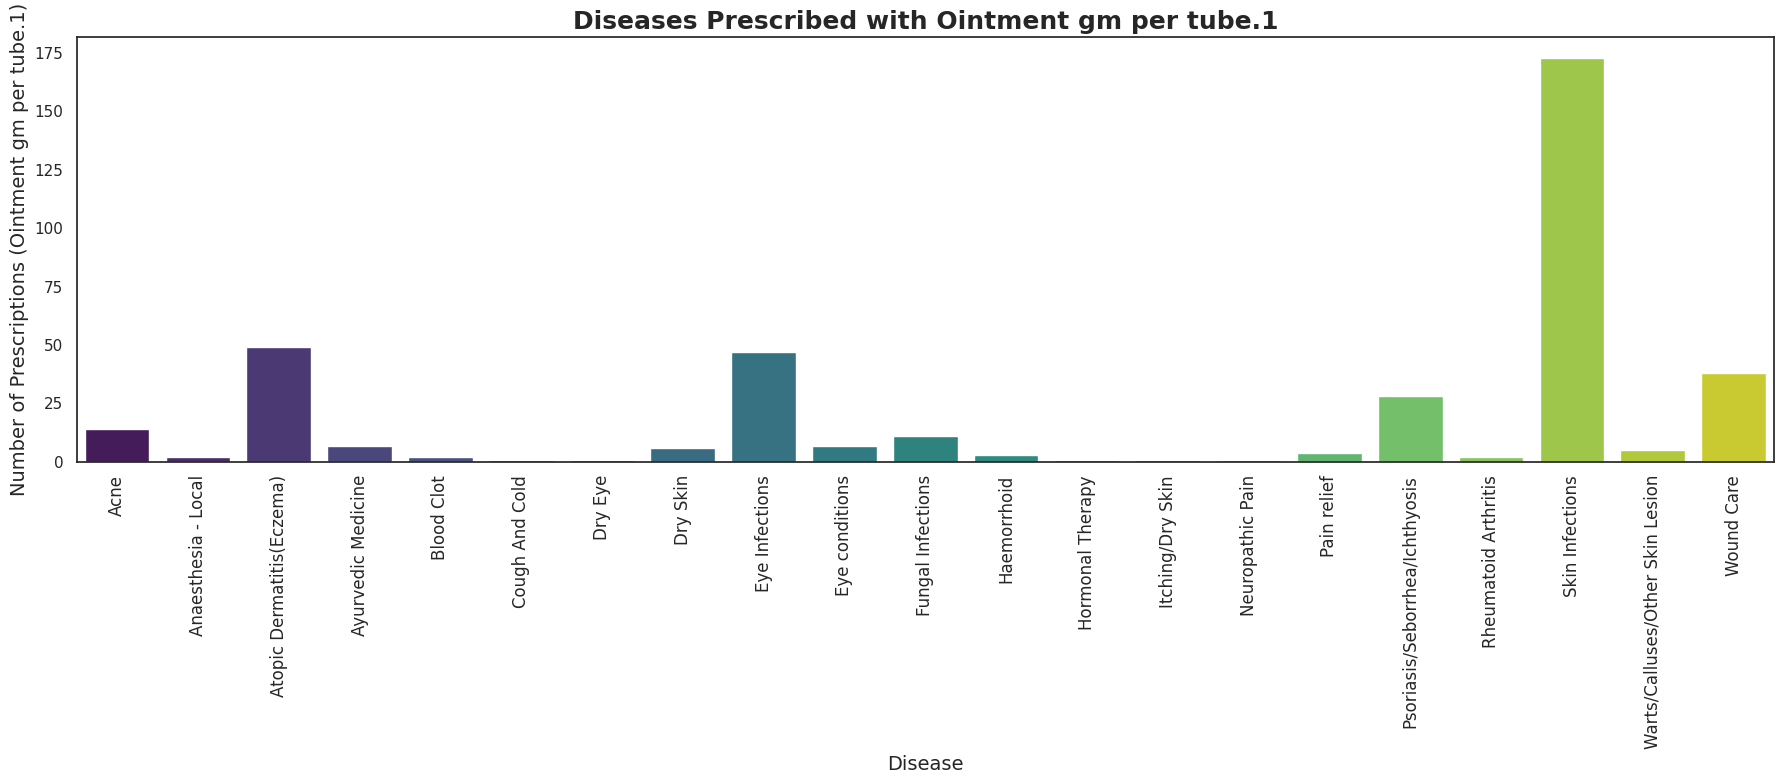

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


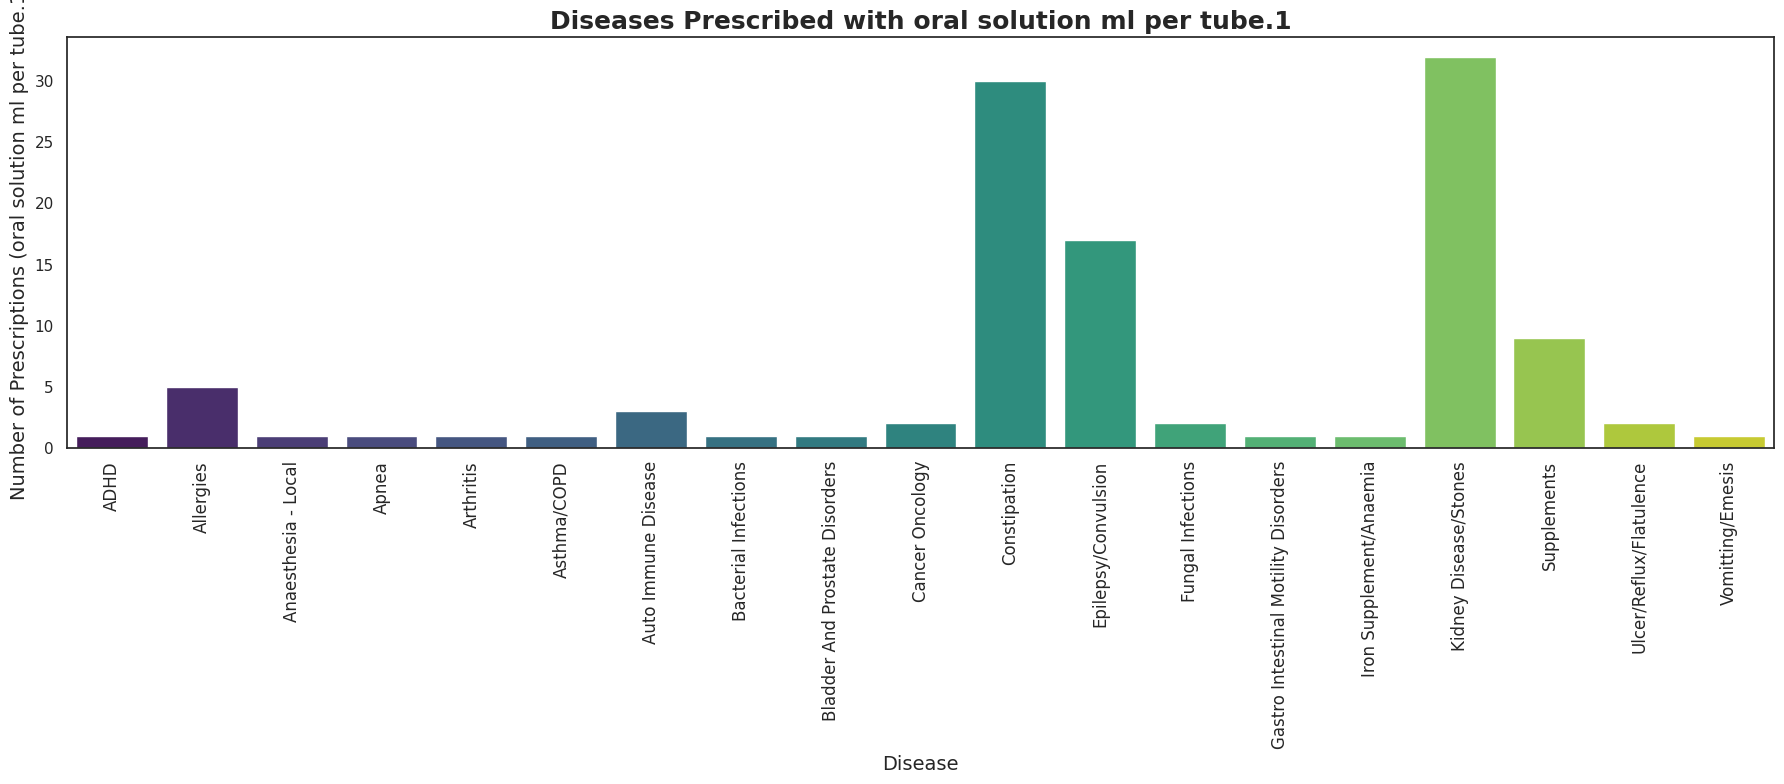

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


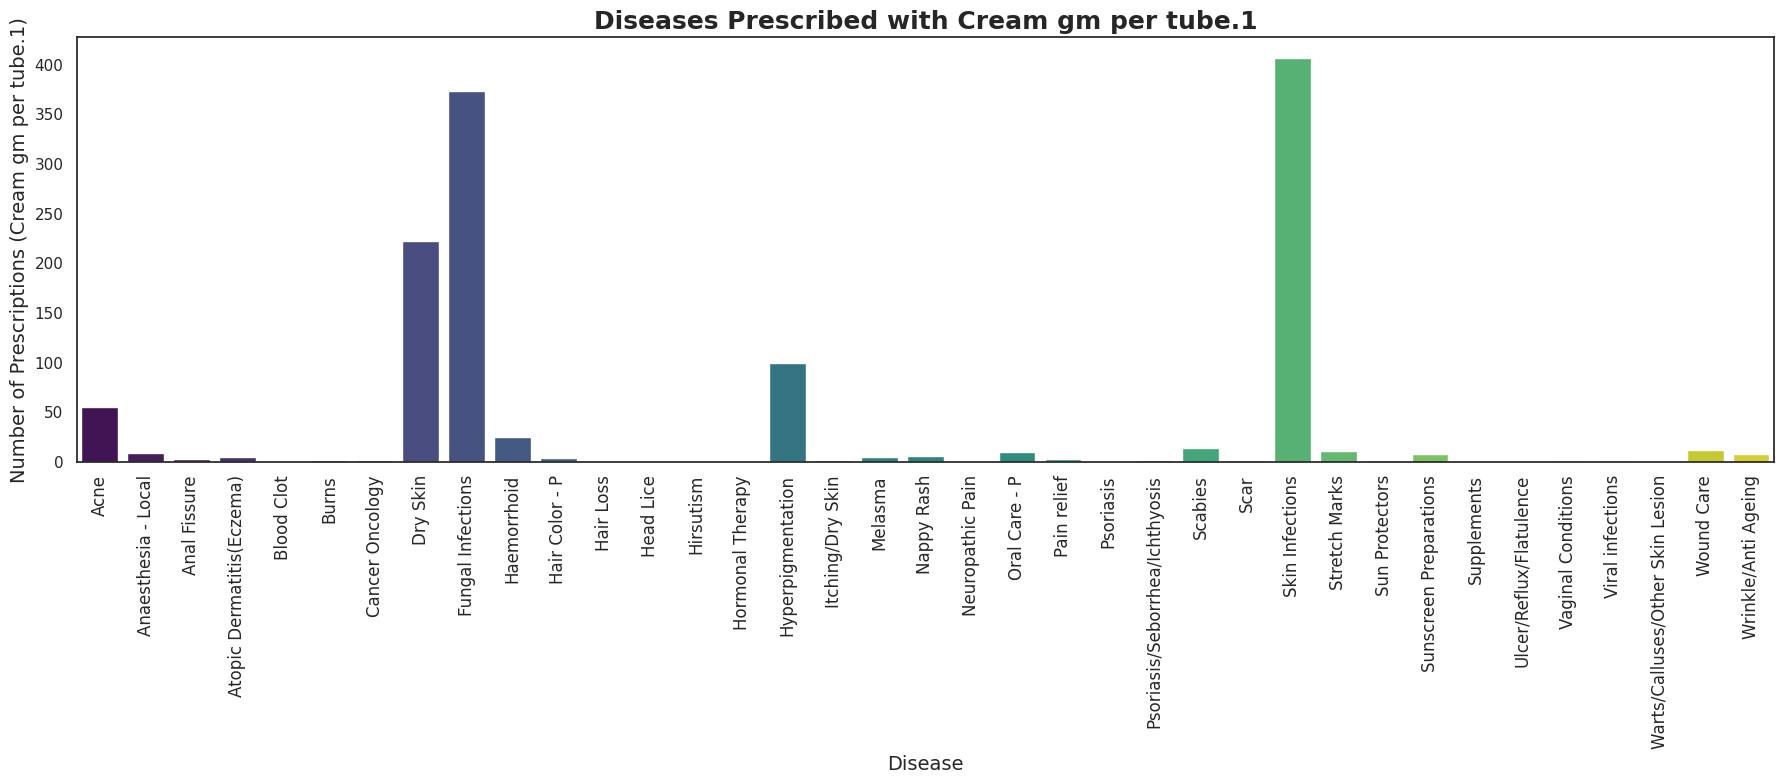

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


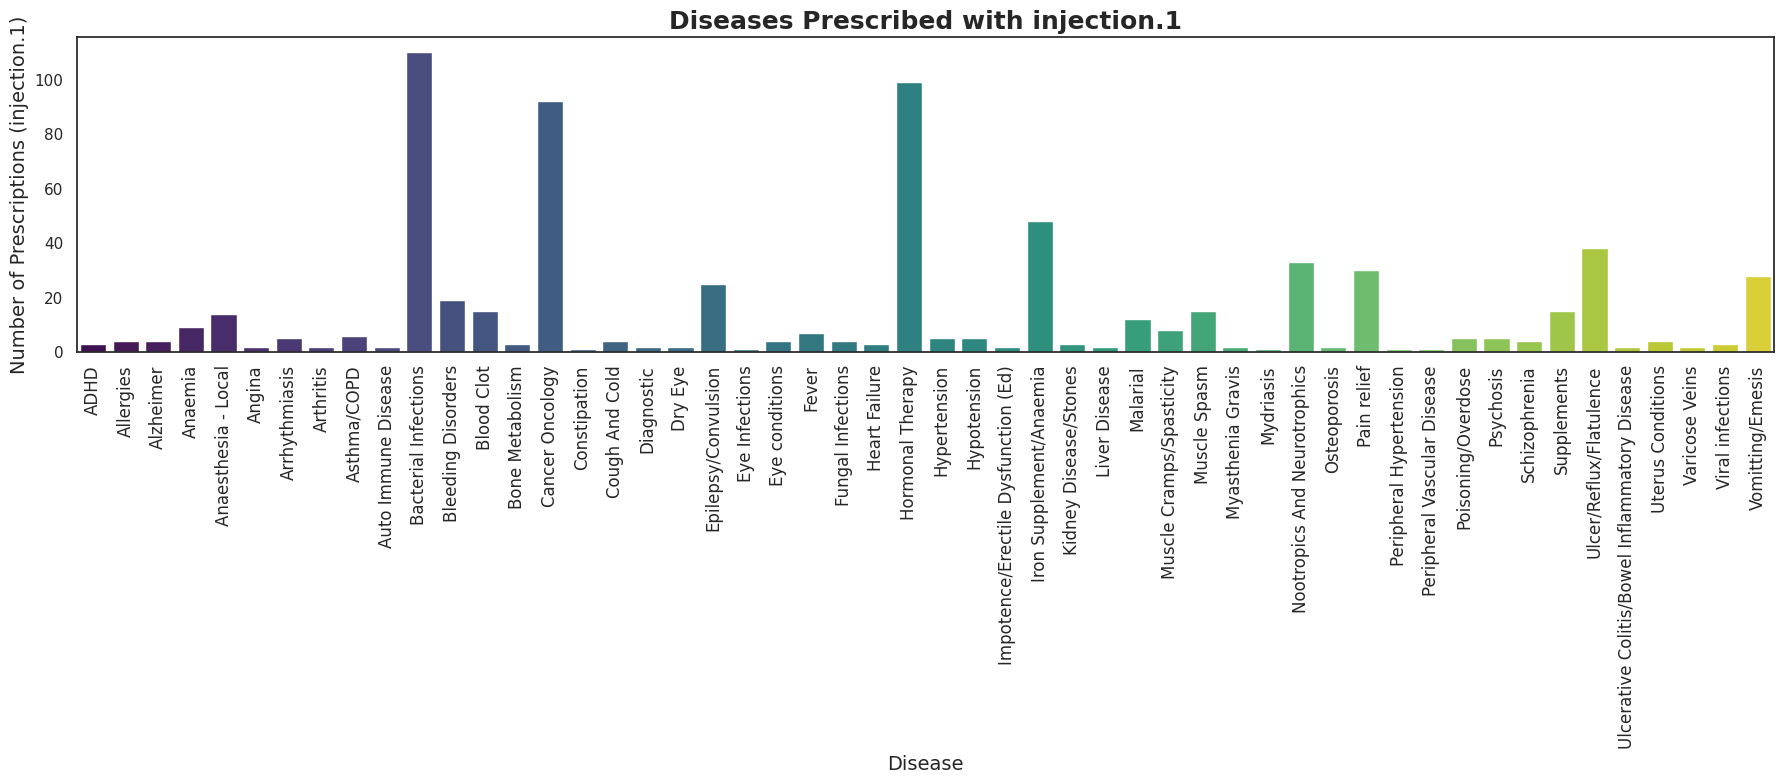

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


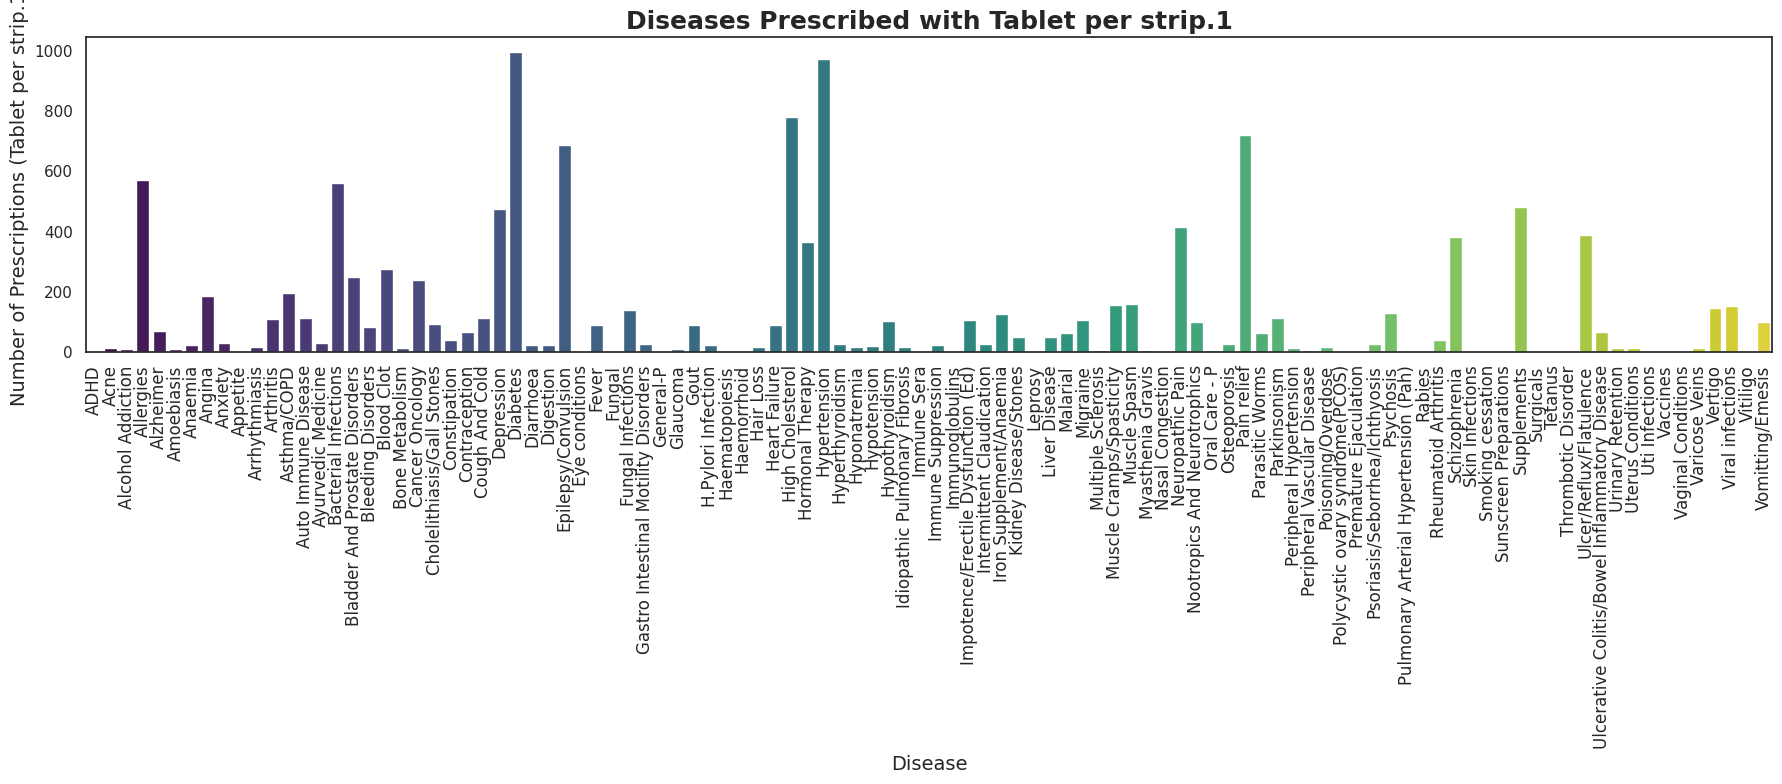

<ipython-input-32-c3038133001e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


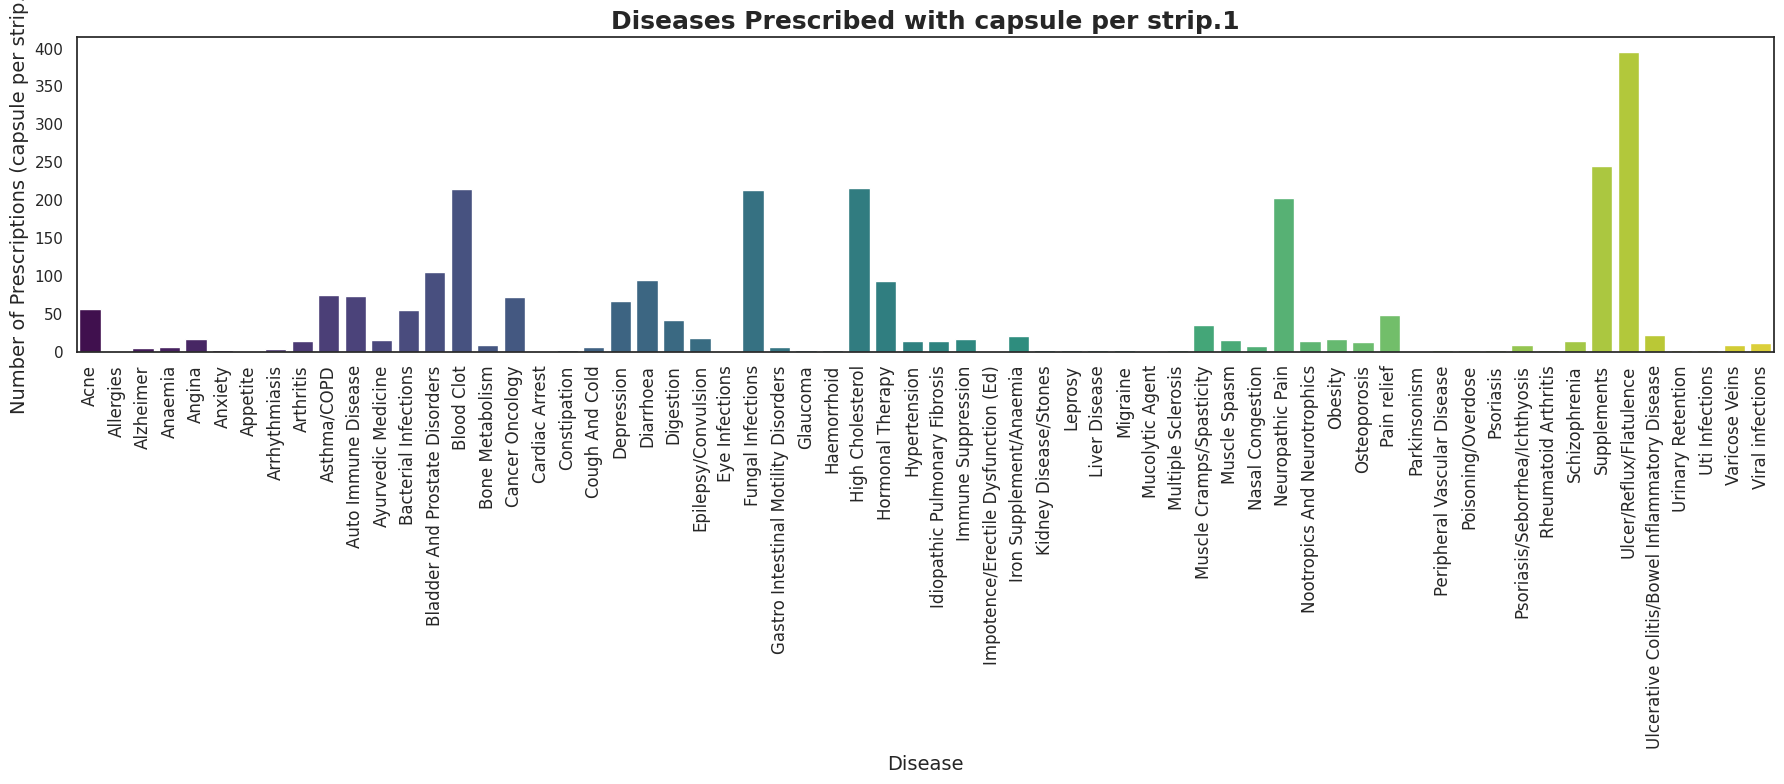

In [32]:
columns_to_process = [
    'gm per lotion',
    'Facewash. gm per tube',
    'Spray ml per tube.1',
    'Ointment gm per tube.1',
    'oral solution ml per tube.1',
    'Cream gm per tube.1',
    'injection.1',
    'Tablet per strip.1',
    'capsule per strip.1'
]

for column in columns_to_process:
    # Marking all non-zero values as 1
    data[column] = data[column].apply(lambda x: 1 if x > 0 else 0)

    # Grouping by 'Disease' and
    grouped_data = data.groupby('Disease')[column].sum().reset_index()
    # Filtering diseases where the column has been prescribed (sum > 0)
    grouped_data = grouped_data[grouped_data[column] > 0]
    plt.figure(figsize=(18, 8))
    sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')
    plt.title(f'Diseases Prescribed with {column}', fontsize=18, fontweight='bold')
    plt.xlabel('Disease', fontsize=14)
    plt.ylabel(f'Number of Prescriptions ({column})', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()


# **Machine Learning Model Building**

In [33]:
df = pd.read_excel('/content/Final medicine cleaned model.xlsx')
df2 = df.copy()


In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Tablet Name: 8725 unique values
Drug 1: 766 unique values
Drug 2: 383 unique values
Drug 3: 216 unique values


       Tablet per Strip  Drug 1 Quantity  Drug 2 Quantity  Drug 3 Quantity  \
count      12341.000000     12367.000000     12367.000000     12367.000000   
mean          12.905680       254.534244       100.744158        95.354654   
std           18.425038      3724.994235       961.708256      2821.442705   
min            1.000000         0.000000         0.000000         0.000000   
25%           10.000000        10.000000         0.000000         0.000000   
50%           10.000000        40.000000         0.000000         0.000000   
75%           10.000000       150.000000        12.000000         0.000000   
max         1000.000000    200000.000000     50000.000000    150000.000000   

               Price  
count   12367.000000  
mean      351.338562  
std      2464.054584  
min         1.000000  
25%        79.500000  
50%       144.000000  
75%       241.000000  
max    136503.000000  


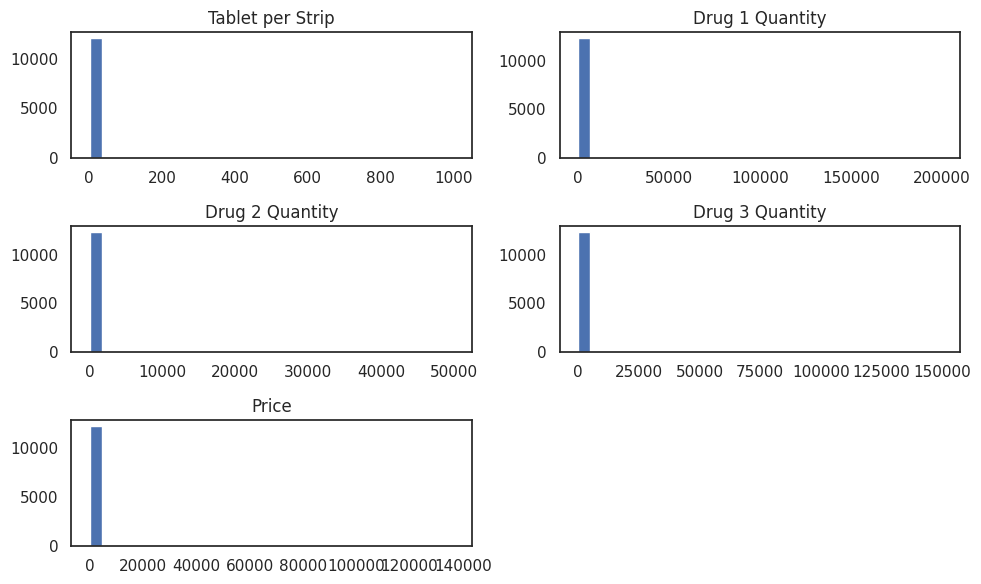

In [35]:
print(df.describe())

# Plotting  histograms for numerical columns for checking distribution
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(10, 6), bins=30, grid=False)
plt.tight_layout()
plt.show()

In [36]:
# Checking skewness of relevant numerical columns
skew_values = df[['Tablet per Strip', 'Drug 1 Quantity', 'Drug 2 Quantity', 'Drug 3 Quantity', 'Price']].skew()
print(skew_values)


Tablet per Strip    29.056117
Drug 1 Quantity     35.606328
Drug 2 Quantity     46.960626
Drug 3 Quantity     42.419964
Price               39.208527
dtype: float64


In [37]:
#Standardizing
#Applying log transformation to reduce skewness
df['Drug 1 Quantity'] = np.log1p(df['Drug 1 Quantity'])
df['Drug 2 Quantity'] = np.log1p(df['Drug 2 Quantity'])

# Caping values of Drug 3 Quantity based on the 95th percentile
upper_limit = df['Drug 3 Quantity'].quantile(0.95)  # Set to 95th percentile
df['Drug 3 Quantity'] = np.where(df['Drug 3 Quantity'] > upper_limit, upper_limit, df['Drug 3 Quantity'])

# Applying log transformation on Price (target variable)
df['Price'] = np.log1p(df['Price'])

# Applying Box-Cox transformation on "Tablet per Strip" if values are greater than 0
if (df['Tablet per Strip'] > 0).all():
    df['Tablet per Strip'], _ = boxcox(df['Tablet per Strip'])
else:
    df['Tablet per Strip'] = np.log1p(df['Tablet per Strip'])  # Log transformation as fallback

# recheking  skewness after transformation
skew_values = df[['Tablet per Strip', 'Drug 1 Quantity', 'Drug 2 Quantity', 'Drug 3 Quantity', 'Price']].skew()
print(skew_values)

Tablet per Strip    1.904258
Drug 1 Quantity     0.124752
Drug 2 Quantity     1.196296
Drug 3 Quantity     3.595602
Price               0.656904
dtype: float64


In [38]:
# Initializing the target encoder
target_encoder = TargetEncoder()

# Applying target encoding on categorical columns
df[['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']] = target_encoder.fit_transform(
    df[['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']], df['Price']
)

In [40]:
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainingh the model
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.16004079635557808
Root Mean Squared Error: 0.245389096031637
R² Score: 0.9414909951339021


In [42]:
# new data for prediction
new_data = pd.DataFrame({
    'Tablet Name': ['tryspin-Chymotrypsin '],
    'Tablet per Strip': [20],
    'Drug 1': ['tryspin'],
    'Drug 1 Quantity': [20],
    'Drug 2': ['Not Present'],
    'Drug 2 Quantity': [20],
    'Drug 3': ['Not Present'],
    'Drug 3 Quantity': [0]
})
# ensuring same steps to followed for new prediction same as of training
# Step 1: Transforming the categorical columns in the new data using the already fitted target encoder
new_data[['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']] = target_encoder.transform(new_data[['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']])

# Step 2: Applying log1p transformation to numerical features
new_data['Drug 1 Quantity'] = np.log1p(new_data['Drug 1 Quantity'])
new_data['Drug 2 Quantity'] = np.log1p(new_data['Drug 2 Quantity'])
new_data['Drug 3 Quantity'] = np.log1p(new_data['Drug 3 Quantity'])  # Or cap if necessary

# Applying Box-Cox transformation to 'Tablet per Strip' if it's > 0 and has variation
if (new_data['Tablet per Strip'] > 0).all() and new_data['Tablet per Strip'].nunique() > 1:
    new_data['Tablet per Strip'], _ = boxcox(new_data['Tablet per Strip'])
else:
    new_data['Tablet per Strip'] = np.log1p(new_data['Tablet per Strip'])  # Log transformation as fallback

# Step 3: Aligning the columns of new data with the columns used during training
X_train_columns = [
    'Tablet Name', 'Tablet per Strip', 'Drug 1', 'Drug 1 Quantity',
    'Drug 2', 'Drug 2 Quantity', 'Drug 3', 'Drug 3 Quantity'
]

# Reordering new data columns to match the training data's feature order
new_data = new_data[X_train_columns]

# Step 4: Predicting the price for the new tablet using the trained model
predicted_price_log = rf.predict(new_data)

# Step 5: Reverseing the log1p transformation for the predicted price because we did Scaling on training data
predicted_price = np.expm1(predicted_price_log[0])  # Inverse of log1p transformation

# Output the predicted price
print(f"Predicted Price for the new tablet: {predicted_price}")


Predicted Price for the new tablet: 148.6679069655327


# **Hypothesis Testing**

For Numerical Columns: Hypothesis Test: Pearson Correlation Test

Null Hypothesis (H₀): There is no linear correlation between the numerical variable and Price. (Correlation = 0)

Alternative Hypothesis (H₁): There is a linear correlation between the numerical variable and Price. (Correlation ≠ 0)

You are testing the correlation between each numerical feature (Tablet per Strip, Drug 1 Quantity, Drug 2 Quantity, Drug 3 Quantity) and Price.

The test returns: Correlation: The degree of linear relationship between the two variables. P-Value: The probability of obtaining the observed correlation under the null hypothesis.

For Categorical Columns: Hypothesis Test: Chi-Square Test of Independence Null Hypothesis (H₀): There is no association between the categorical feature and Price.

Alternative Hypothesis (H₁): There is a significant association between the categorical feature and Price.

You are testing the relationship between each categorical feature (Tablet Name, Drug 1, Drug 2, Drug 3) and Price using the Chi-Square test. The test returns:

Chi-Square Statistic (Chi²): A measure of how much observed frequencies differ from expected frequencies.

P-Value: The probability that the observed Chi-Square statistic is due to random chance.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, f_oneway

# Function to perform hypothesis testing for numerical columns
def numerical_hypothesis_testing(df):
    numerical_columns = ['Tablet per Strip', 'Drug 1 Quantity', 'Drug 2 Quantity', 'Drug 3 Quantity']
    results = {}

    for column in numerical_columns:
        # Dropping  rows where either column or target price is NaN
        df_cleaned = df[[column, 'Price']].dropna()
        correlation, p_value = pearsonr(df_cleaned[column], df_cleaned['Price'])
        results[column] = {'Correlation': correlation, 'P-Value': p_value}
    return results

# Function to perform hypothesis testing for categorical columns
def categorical_hypothesis_testing(df):
    categorical_columns = ['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']
    results = {}

    for column in categorical_columns:
        # Replacing Nan with unknown value
        df_cleaned = df[[column, 'Price']].fillna('Unknown')

        # Performing Chi-Square test for independence
        contingency_table = pd.crosstab(df_cleaned[column], df_cleaned['Price'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        results[column] = {'Chi2': chi2, 'P-Value': p_value}
    return results

numerical_results = numerical_hypothesis_testing(df)
categorical_results = categorical_hypothesis_testing(df)
combined_results = {'Numerical Results': numerical_results, 'Categorical Results': categorical_results}
combined_results


{'Numerical Results': {'Tablet per Strip': {'Correlation': np.float64(0.2710312653494842),
   'P-Value': np.float64(9.937630437206097e-207)},
  'Drug 1 Quantity': {'Correlation': np.float64(0.17583233000687234),
   'P-Value': np.float64(1.9335134345321422e-86)},
  'Drug 2 Quantity': {'Correlation': np.float64(0.03976259733339938),
   'P-Value': np.float64(9.7257783104259e-06)},
  'Drug 3 Quantity': {'Correlation': np.float64(0.06271257101191963),
   'P-Value': np.float64(2.946681341558359e-12)}},
 'Categorical Results': {'Tablet Name': {'Chi2': np.float64(9580082.683827447),
   'P-Value': np.float64(0.0)},
  'Drug 1': {'Chi2': np.float64(1521889.5638629885),
   'P-Value': np.float64(0.0)},
  'Drug 2': {'Chi2': np.float64(615686.1787382069),
   'P-Value': np.float64(0.0)},
  'Drug 3': {'Chi2': np.float64(393895.2785234076),
   'P-Value': np.float64(0.0)}}}

<ipython-input-63-b876b2eec942>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numerical_features, y=correlation_values, palette="Blues_d")


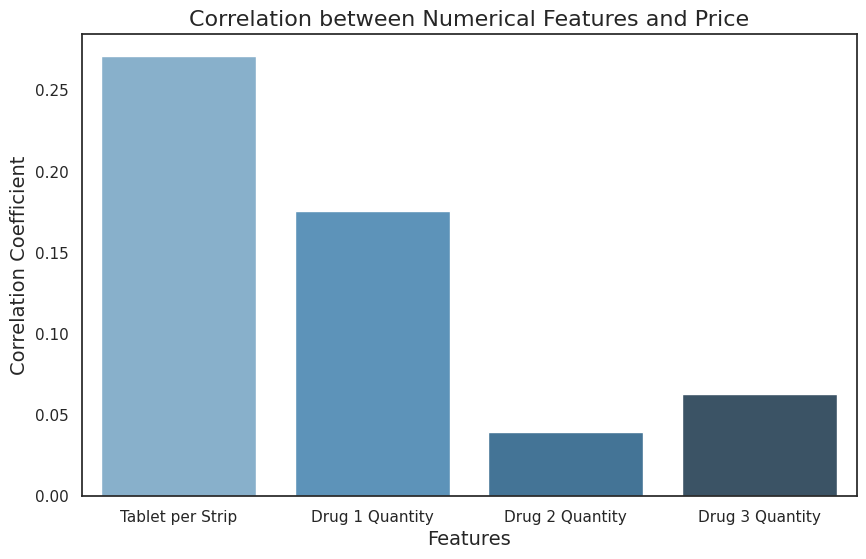

<ipython-input-63-b876b2eec942>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_features, y=chi_square_values, palette="viridis")


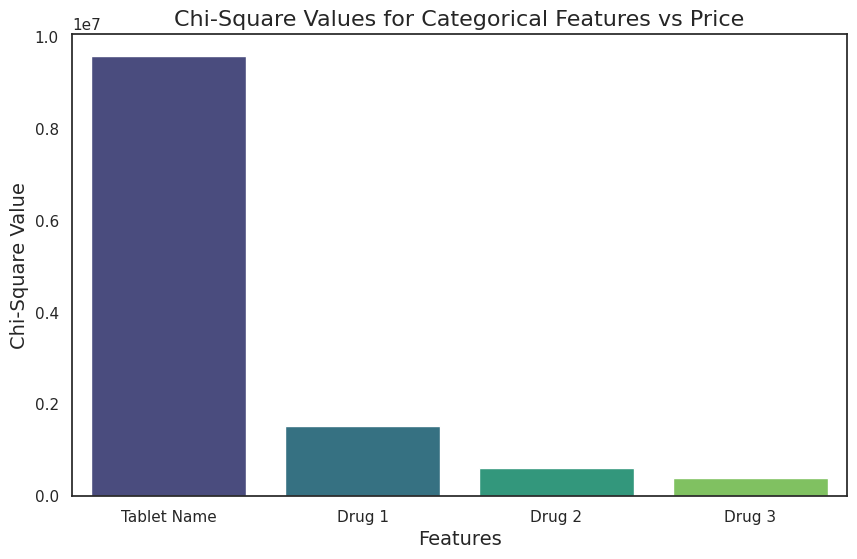

In [ ]:
# Numerical Features: Correlation with Price
numerical_features = ['Tablet per Strip', 'Drug 1 Quantity', 'Drug 2 Quantity', 'Drug 3 Quantity']
correlation_values = [0.2710312653494842, 0.17583233000687234, 0.03976259733339938, 0.06271257101191963]

# Create a bar plot for correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=numerical_features, y=correlation_values, palette="Blues_d")
plt.title('Correlation between Numerical Features and Price', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()

# Categorical Features: Chi-Square Values
categorical_features = ['Tablet Name', 'Drug 1', 'Drug 2', 'Drug 3']
chi_square_values = [9580082.683827447, 1521889.5638629885, 615686.1787382069, 393895.2785234076]

# Create a bar plot for Chi-Square values
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_features, y=chi_square_values, palette="viridis")
plt.title('Chi-Square Values for Categorical Features vs Price', fontsize=16)
plt.ylabel('Chi-Square Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()
